In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
def load_data(path):
    df=pd.read_csv(path)
    #convert all rows and colomns with word Bad, No Data, Tag not found to NaN
    df.replace('Bad',np.nan,inplace=True)
    df.replace('No Data',np.nan,inplace=True)
    df.replace('Tag not found',np.nan,inplace=True)
    df.replace(0,np.nan,inplace=True)
    print('show df',df.head())
    #convert date to datetime
    df['Date']=pd.to_datetime(df['Date'])
    numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge', 
                      'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
    df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric,errors='coerce')
    print(df.shape)
    return df

In [106]:
path='/Users/rianrachmanto/pypro/data/data_esp.csv'
df=load_data(path)

show df   Well_ID                 Date Frequency             Voltage Ampere  \
0     BC1  2023-01-01 00:00:00        60  432.29998779296875     60   
1     BC1  2023-01-01 00:00:00        60  432.29998779296875     60   
2     BC1  2023-01-01 01:00:00        60  434.79998779296875     60   
3     BC1  2023-01-01 01:00:00        60  434.79998779296875     60   
4     BC1  2023-01-01 02:00:00        60   431.8999938964844     60   

  Pressure_Discharge Pressure_Intake Temp_Intake Temp_Motor Vibration_X  \
0                NaN             NaN         NaN        NaN         NaN   
1                NaN             NaN         NaN        NaN         NaN   
2                NaN             NaN         NaN        NaN         NaN   
3                NaN             NaN         NaN        NaN         NaN   
4                NaN             NaN         NaN        NaN         NaN   

  Vibration_Y  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
(339677, 11)


In [107]:
def viz_data(df):
    numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge',
                        'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
    #plotting histogram for numeric columns, one plot for each column
    for col in numeric_columns:
        plt.figure()
        sns.histplot(df[col],kde=True)
        plt.title(col)
        plt.show()

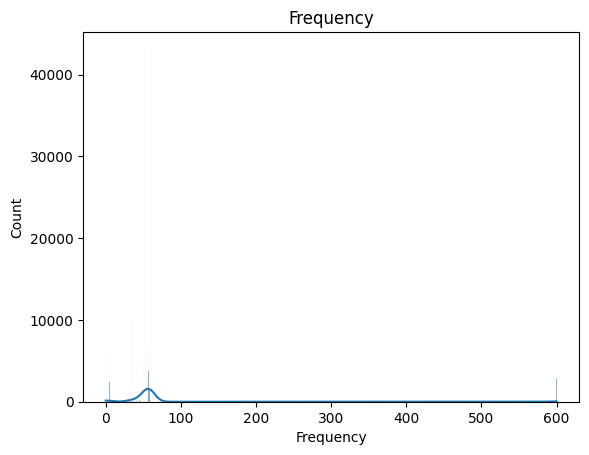

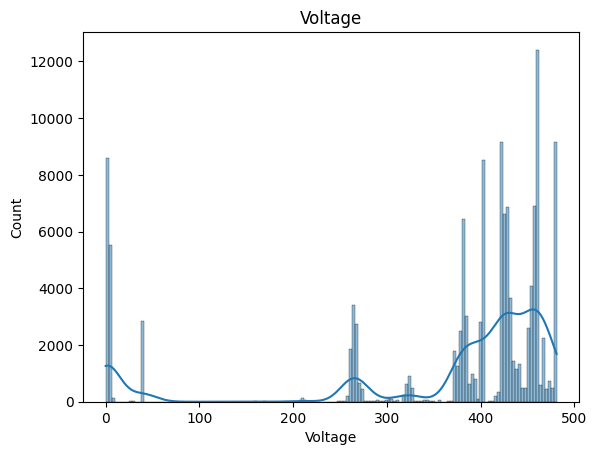

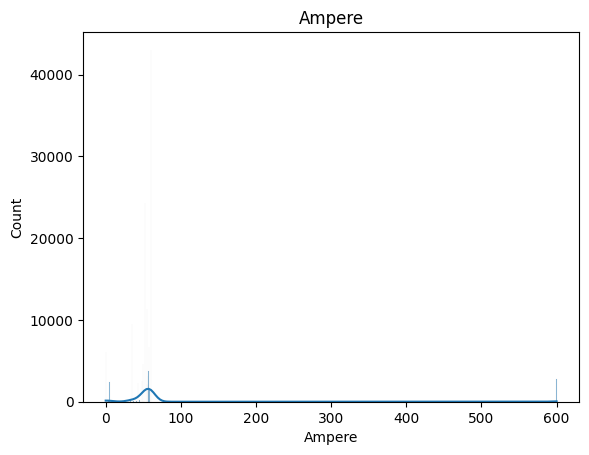

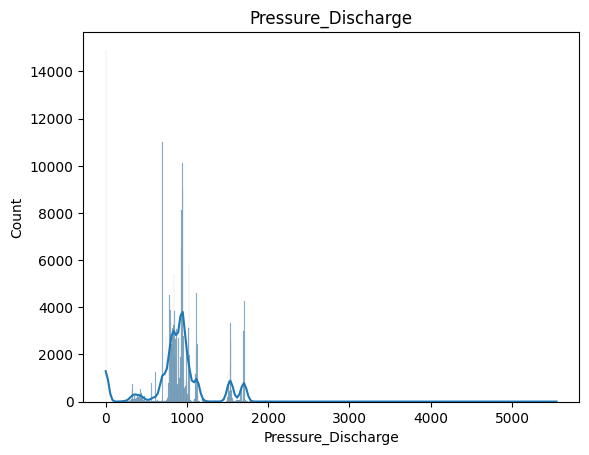

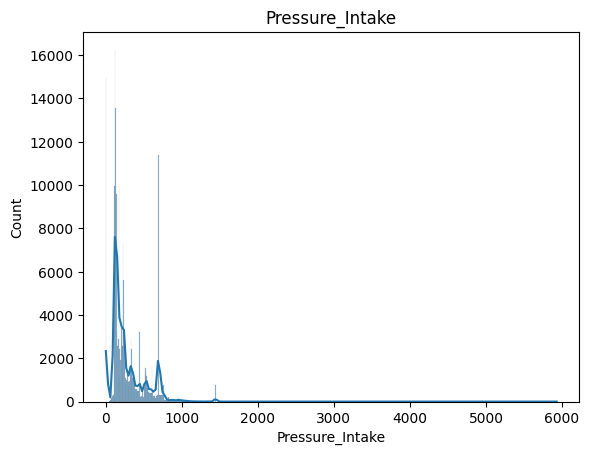

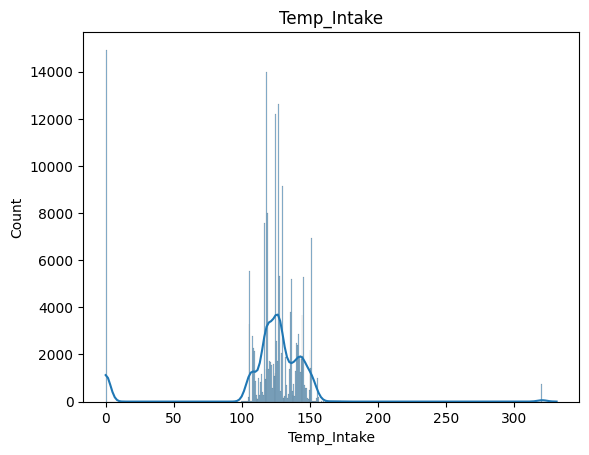

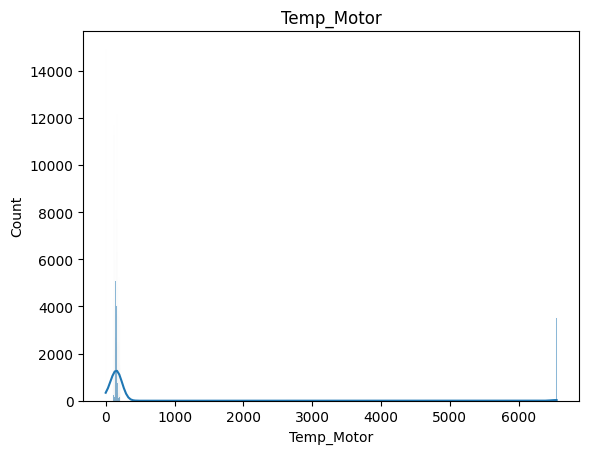

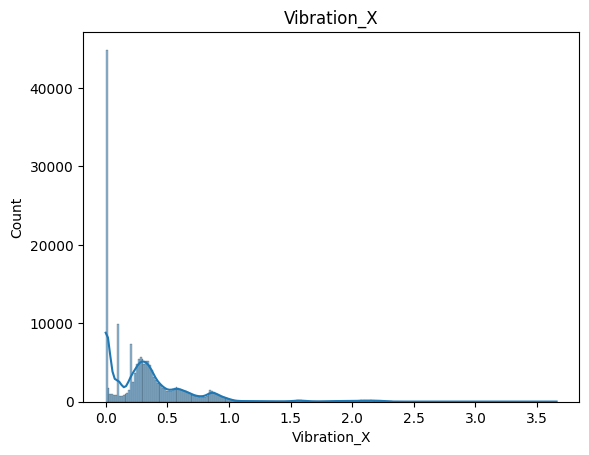

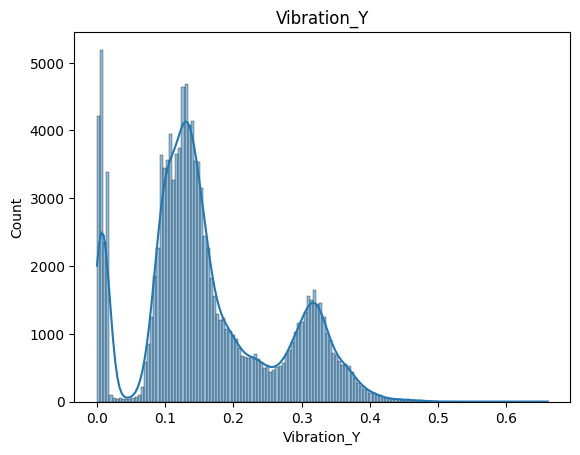

In [108]:
viz_data(df)

In [109]:
'''
def fill_missing(df):
    mean_col=['Pressure_Discharge','Temp_Intake']
    median_col=['Frequency', 'Voltage', 'Ampere', 'Pressure_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
    for col in mean_col:
        df[col].fillna(df[col].mean(),inplace=True)
    for col in median_col:
        df[col].fillna(df[col].median(),inplace=True)
    print ('Missing values after filling: ',df.isnull().sum().sum())
    return df
'''

"\ndef fill_missing(df):\n    mean_col=['Pressure_Discharge','Temp_Intake']\n    median_col=['Frequency', 'Voltage', 'Ampere', 'Pressure_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']\n    for col in mean_col:\n        df[col].fillna(df[col].mean(),inplace=True)\n    for col in median_col:\n        df[col].fillna(df[col].median(),inplace=True)\n    print ('Missing values after filling: ',df.isnull().sum().sum())\n    return df\n"

In [110]:
def dropmissing(df):
    numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge', 
                      'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
    df.dropna(inplace=True)
    print('Missing values after dropping: ',df.isnull().sum().sum())
    #remove all the values that are zeros
    df=df[(df[numeric_columns]!=0).all(axis=1)]
    return df

In [111]:
df2=dropmissing(df)

Missing values after dropping:  0


In [112]:
dict_data_tab0 = {
    'BC1': 'BC1', 'BS3': 'BS3', 'YNA7': 'YNA7', 'YNB8': 'YNB8', 'YNB17': 'YNB17', 'YNB28': 'YNB28',
    'YNB24': 'YNB24', 'YNC10': 'YNC10', 'YNC12': 'YNC12', 'YCA5': 'YCA5', 'YCA10': 'YCA10',
    'YCA7': 'YCA7', 'YCA8': 'YCA8', 'YNB29': 'YNB29', 'YNB30': 'YNB30', 'YCB4': 'YCB4',
    'YNB23': 'YNB23', 'YNB19': 'YNB19', 'YWB15': 'YWB15', 'YWA20': 'YWA20', 'YWA21': 'YWA21',
    'YWA23': 'YWA23', 'YWB22': 'YWB22', 'YWB19': 'YWB19', 'YCA11': 'YCA11', 'YWB14': 'YWB14',
    'YWB17': 'YWB17', 'YWB12': 'YWB12'
}

In [113]:
#plot each well_id in dict_data_tab0 where the plot is Voltage in time series
def plot_voltage(df2,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        df2[df2['Well_ID']==key].plot(x='Date',y='Voltage')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

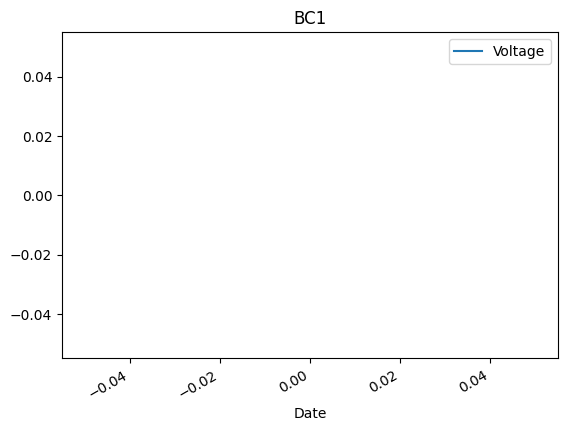

<Figure size 640x480 with 0 Axes>

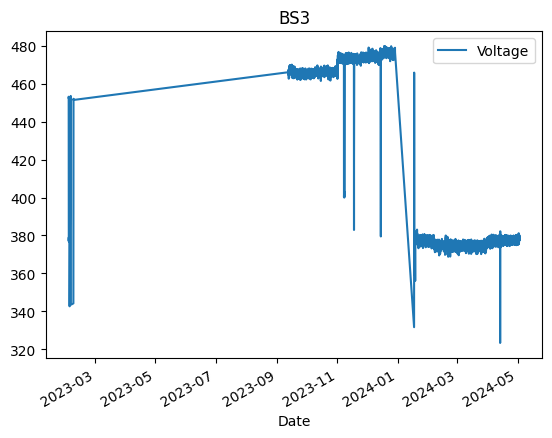

<Figure size 640x480 with 0 Axes>

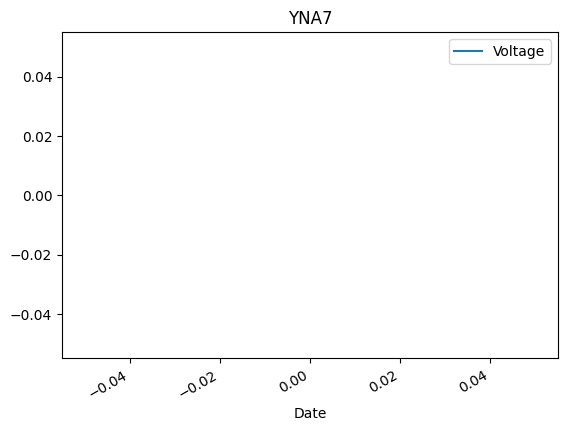

<Figure size 640x480 with 0 Axes>

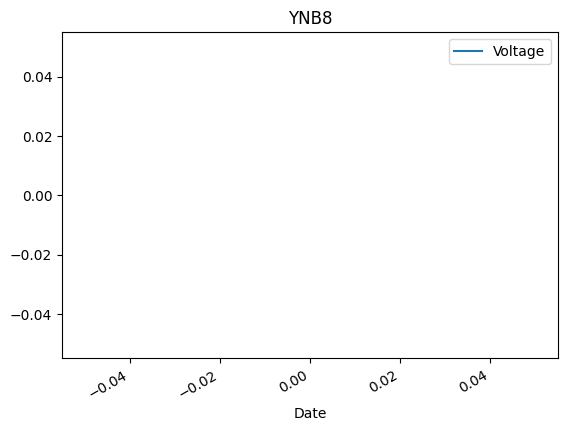

<Figure size 640x480 with 0 Axes>

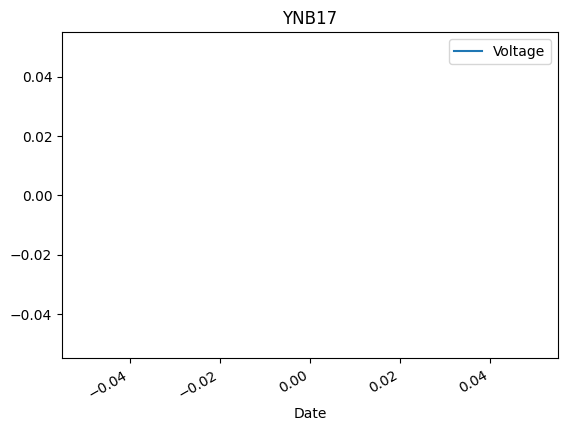

<Figure size 640x480 with 0 Axes>

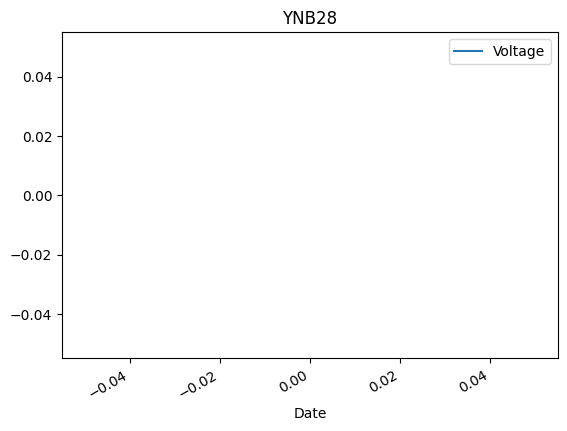

<Figure size 640x480 with 0 Axes>

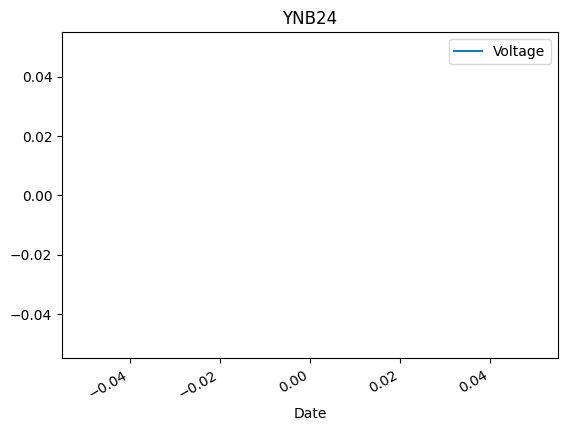

<Figure size 640x480 with 0 Axes>

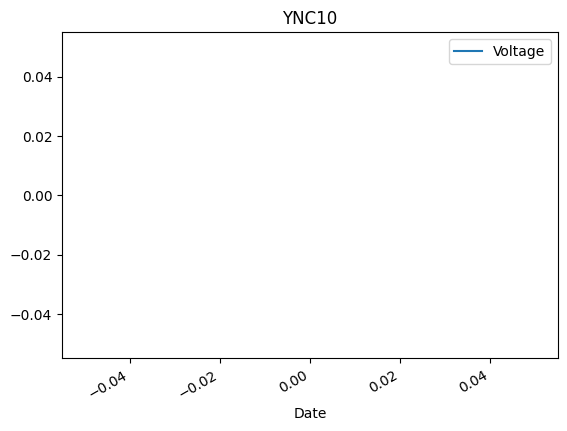

<Figure size 640x480 with 0 Axes>

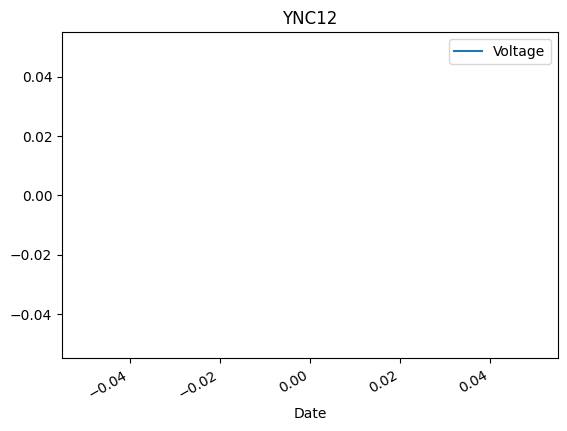

<Figure size 640x480 with 0 Axes>

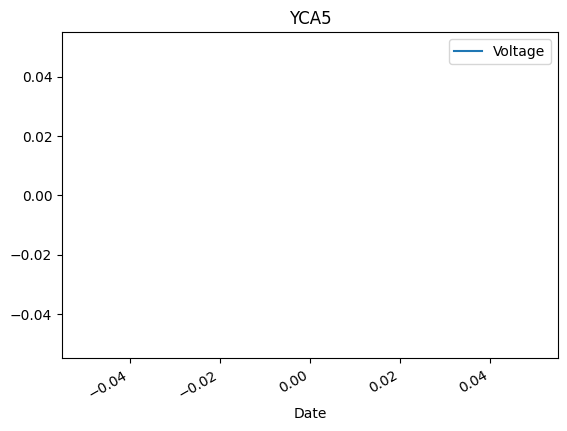

<Figure size 640x480 with 0 Axes>

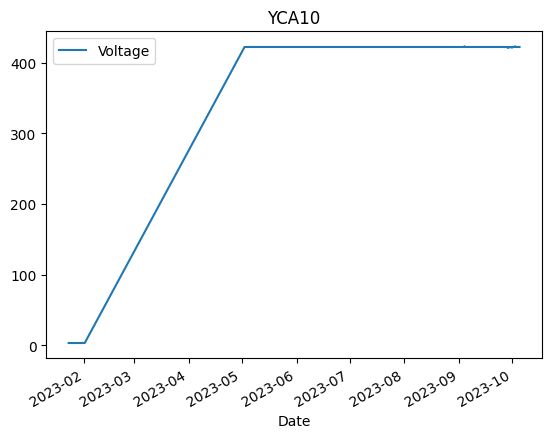

<Figure size 640x480 with 0 Axes>

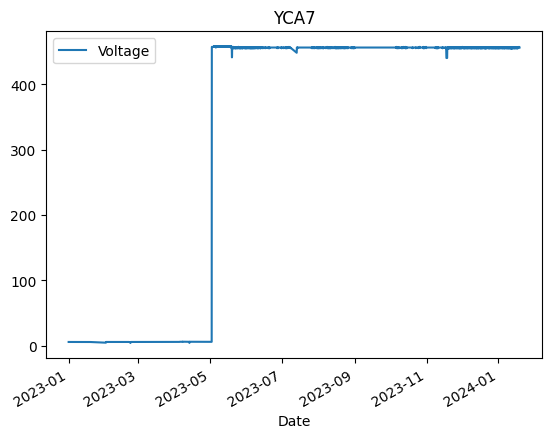

<Figure size 640x480 with 0 Axes>

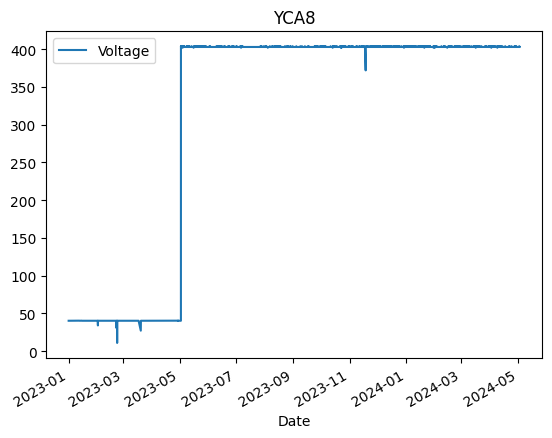

<Figure size 640x480 with 0 Axes>

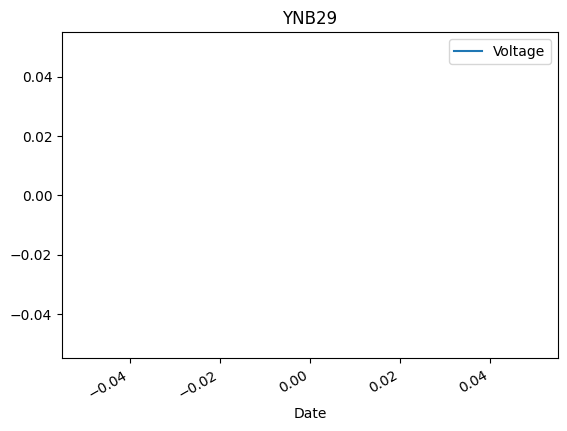

<Figure size 640x480 with 0 Axes>

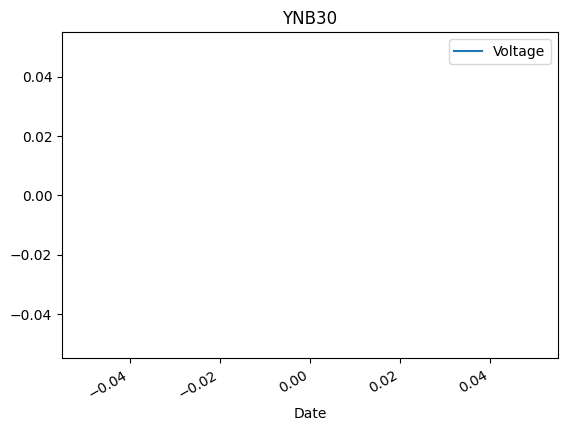

<Figure size 640x480 with 0 Axes>

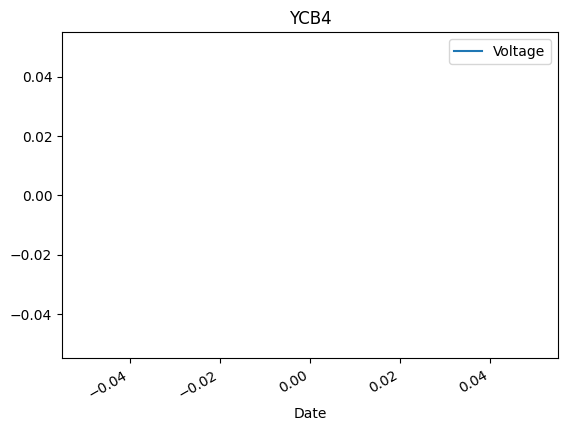

<Figure size 640x480 with 0 Axes>

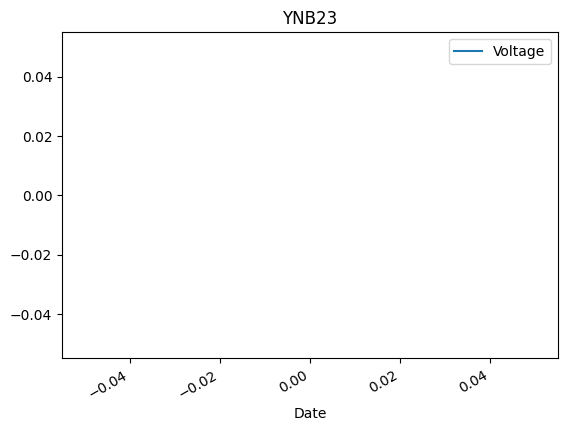

<Figure size 640x480 with 0 Axes>

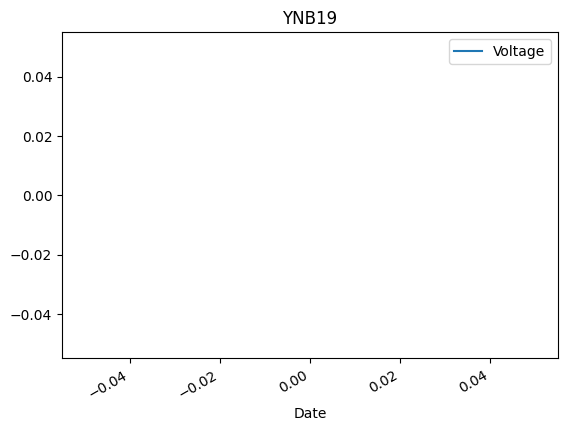

<Figure size 640x480 with 0 Axes>

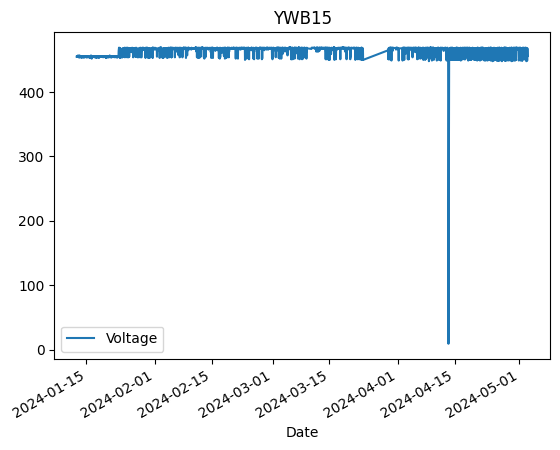

<Figure size 640x480 with 0 Axes>

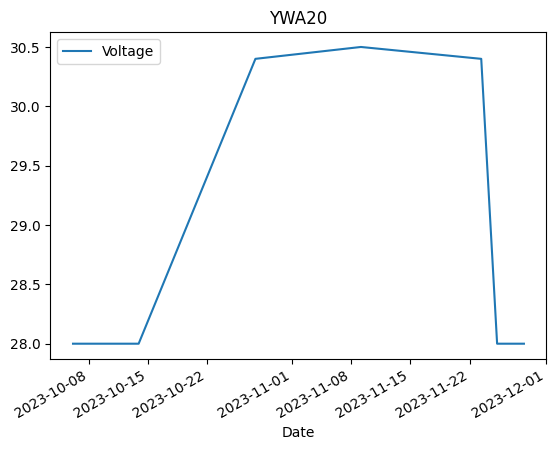

<Figure size 640x480 with 0 Axes>

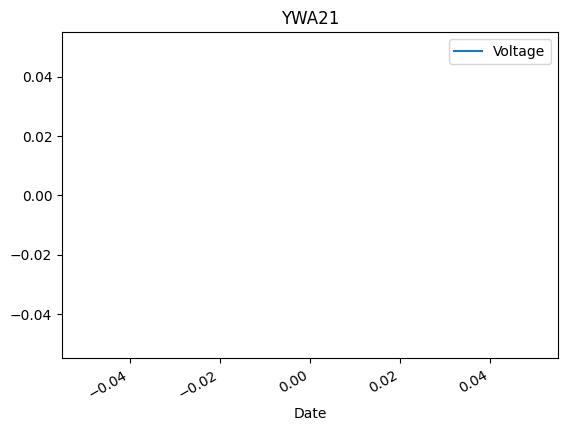

<Figure size 640x480 with 0 Axes>

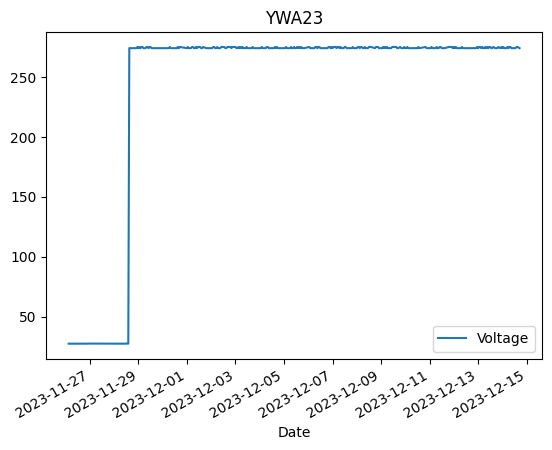

<Figure size 640x480 with 0 Axes>

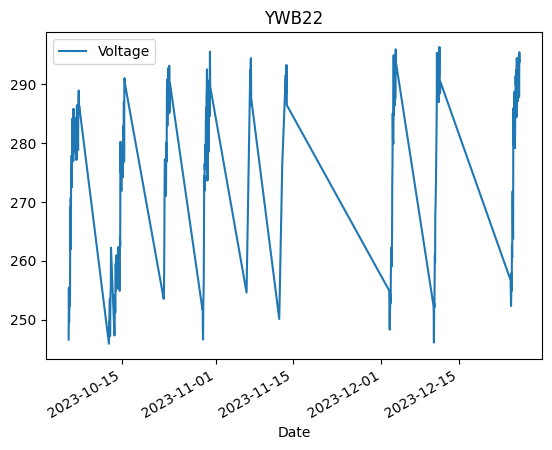

<Figure size 640x480 with 0 Axes>

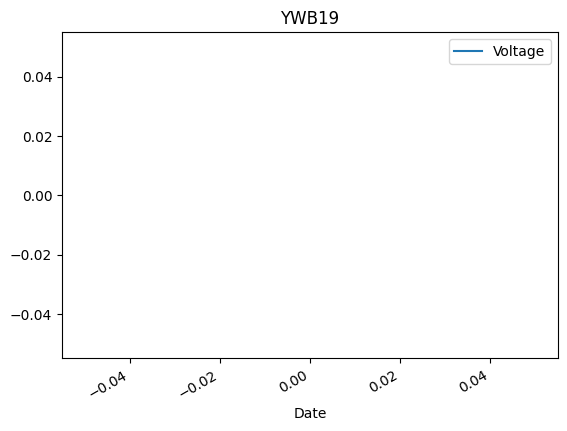

<Figure size 640x480 with 0 Axes>

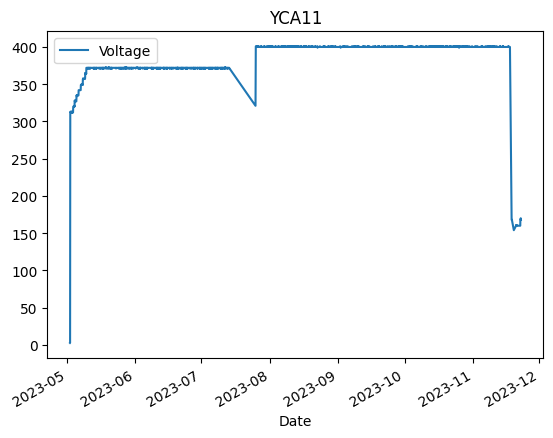

<Figure size 640x480 with 0 Axes>

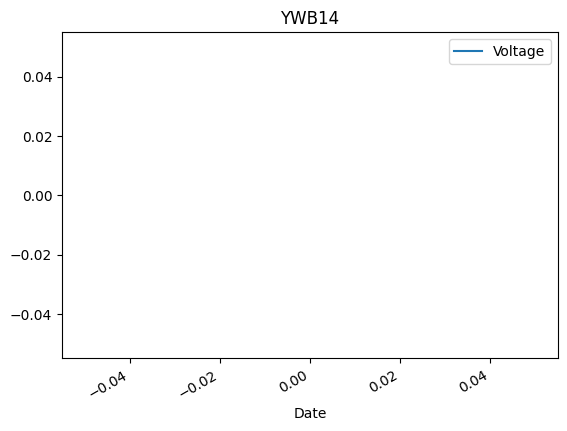

<Figure size 640x480 with 0 Axes>

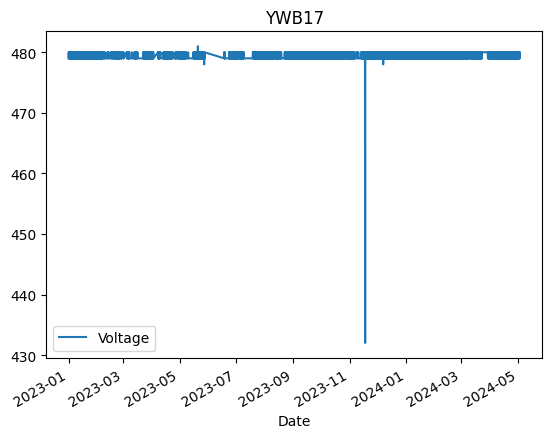

<Figure size 640x480 with 0 Axes>

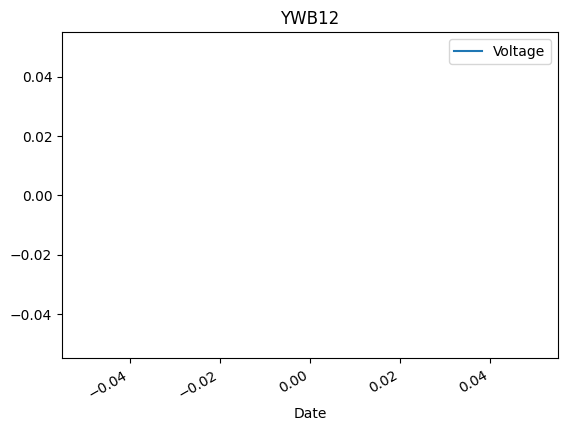

In [114]:
plot_voltage(df2,dict_data_tab0)

In [115]:
def plot_pressure_intake(df2,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        df2[df2['Well_ID']==key].plot(x='Date',y='Pressure_Intake')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

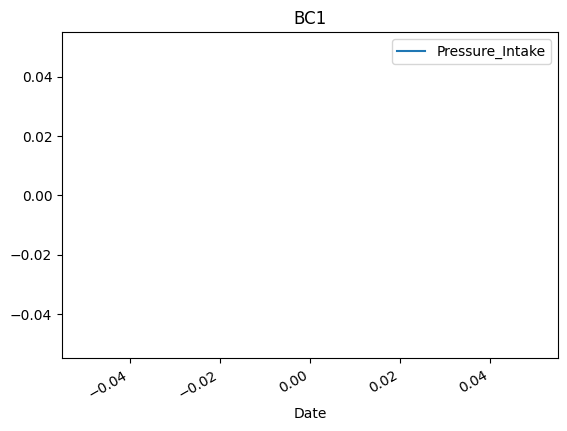

<Figure size 640x480 with 0 Axes>

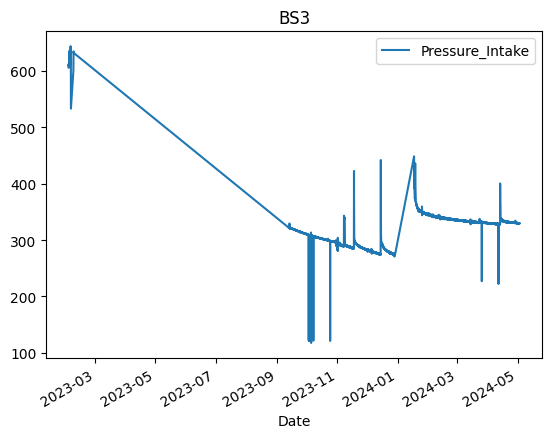

<Figure size 640x480 with 0 Axes>

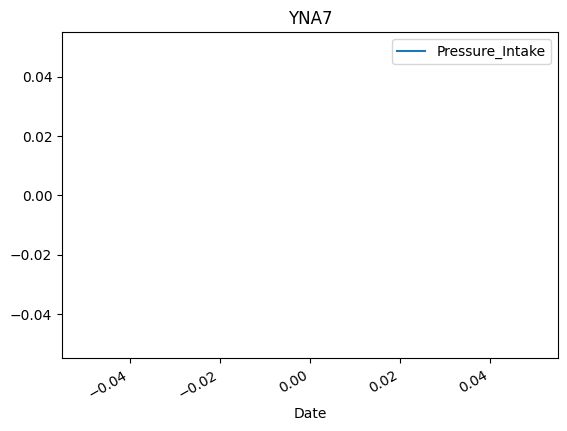

<Figure size 640x480 with 0 Axes>

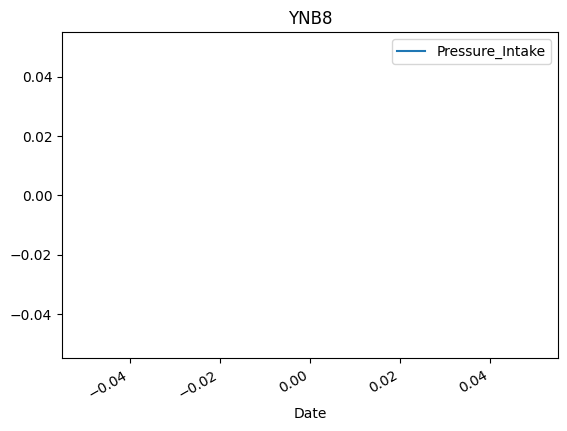

<Figure size 640x480 with 0 Axes>

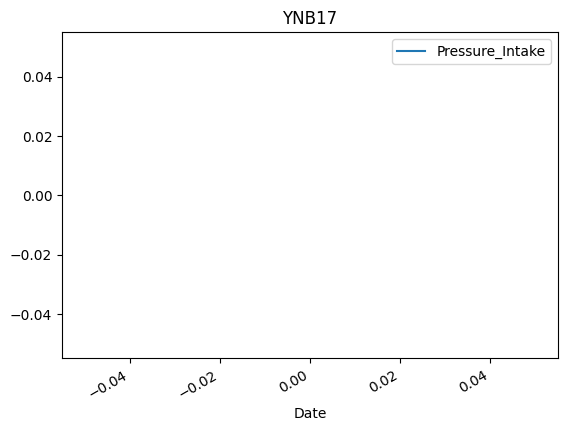

<Figure size 640x480 with 0 Axes>

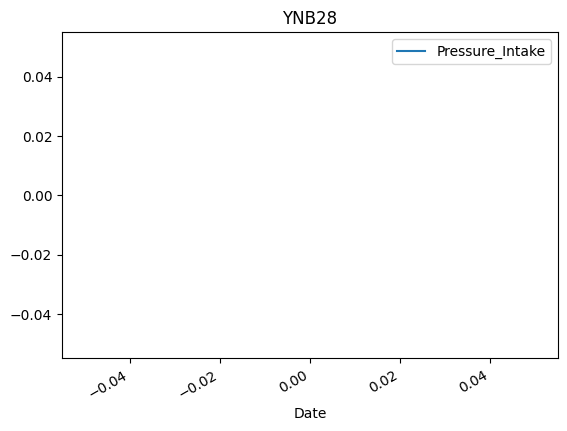

<Figure size 640x480 with 0 Axes>

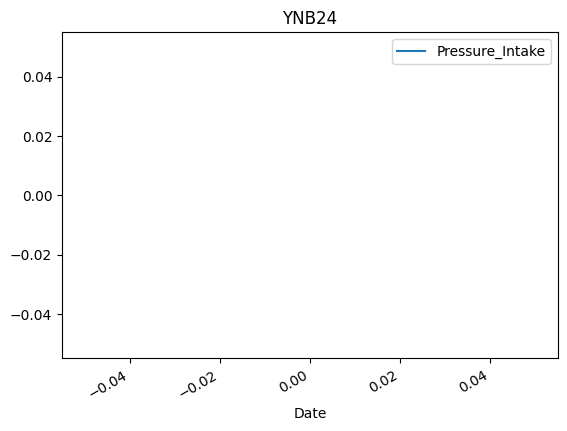

<Figure size 640x480 with 0 Axes>

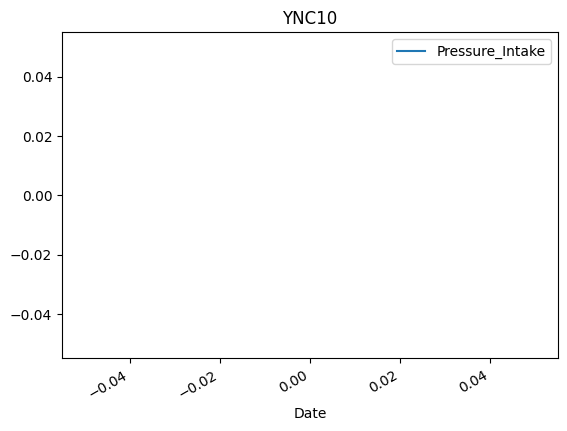

<Figure size 640x480 with 0 Axes>

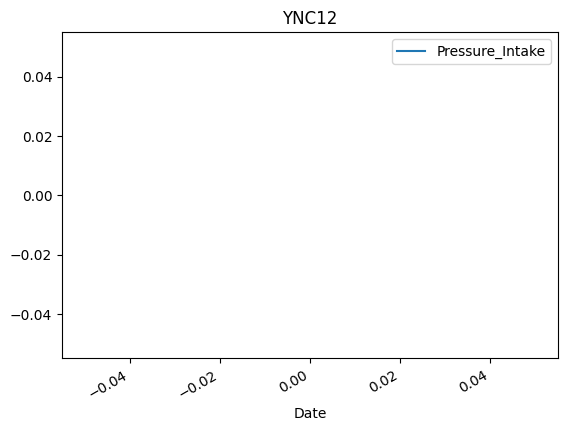

<Figure size 640x480 with 0 Axes>

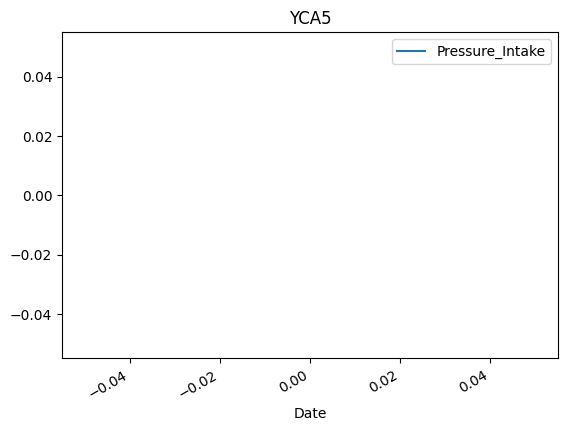

<Figure size 640x480 with 0 Axes>

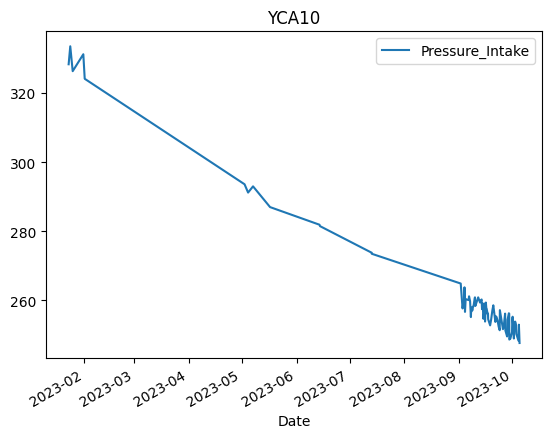

<Figure size 640x480 with 0 Axes>

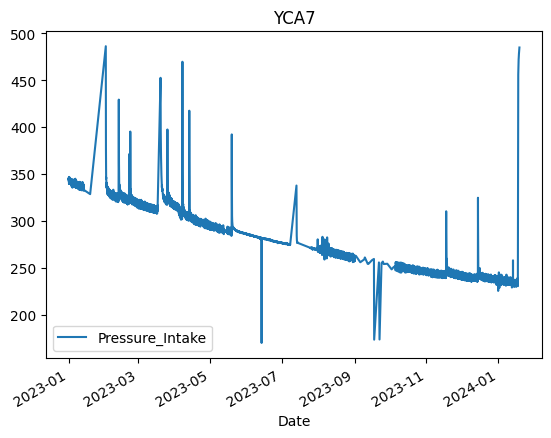

<Figure size 640x480 with 0 Axes>

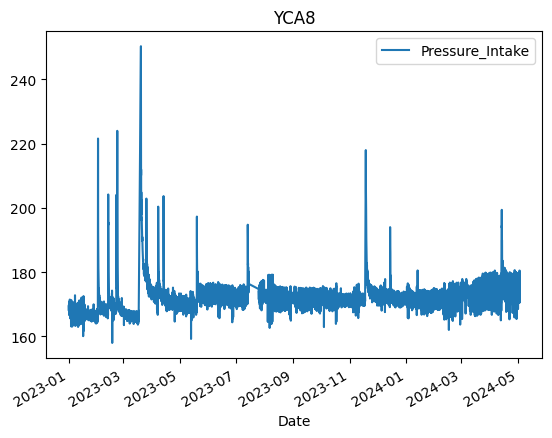

<Figure size 640x480 with 0 Axes>

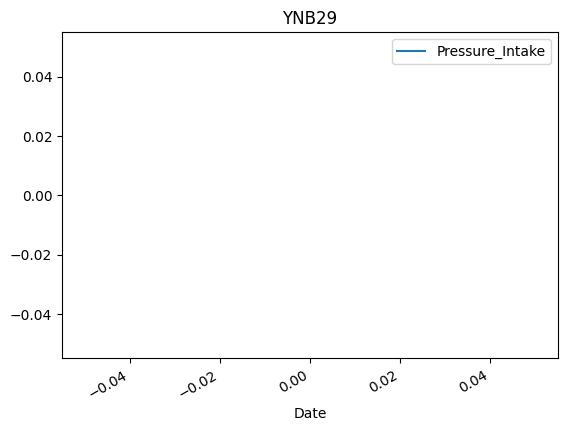

<Figure size 640x480 with 0 Axes>

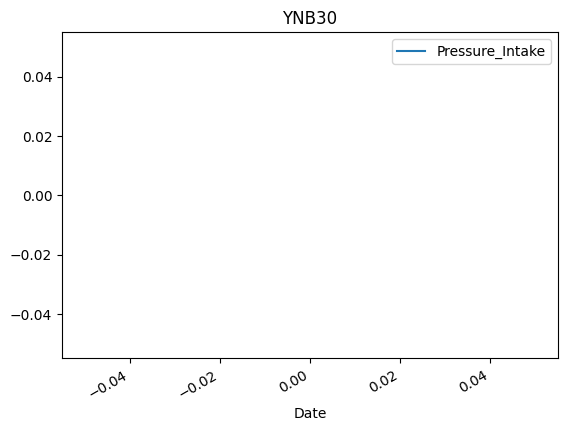

<Figure size 640x480 with 0 Axes>

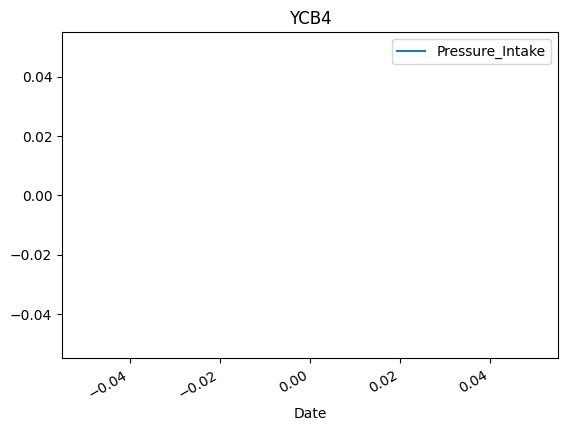

<Figure size 640x480 with 0 Axes>

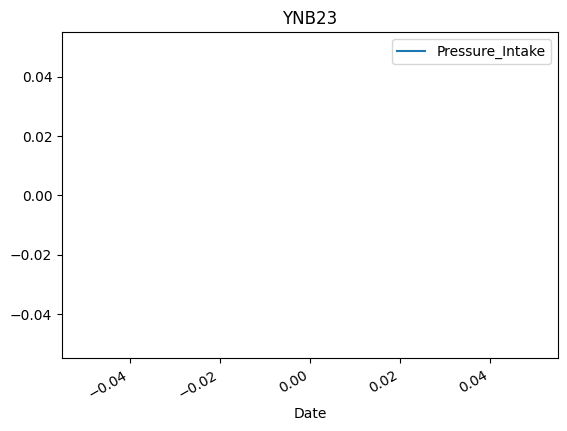

<Figure size 640x480 with 0 Axes>

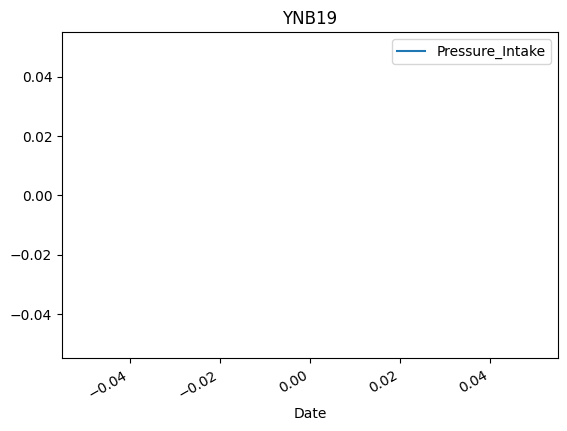

<Figure size 640x480 with 0 Axes>

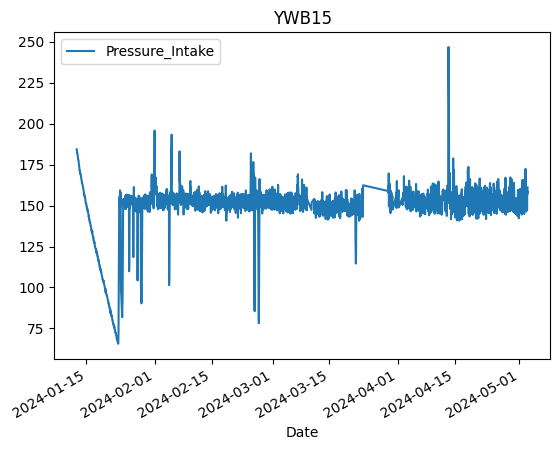

<Figure size 640x480 with 0 Axes>

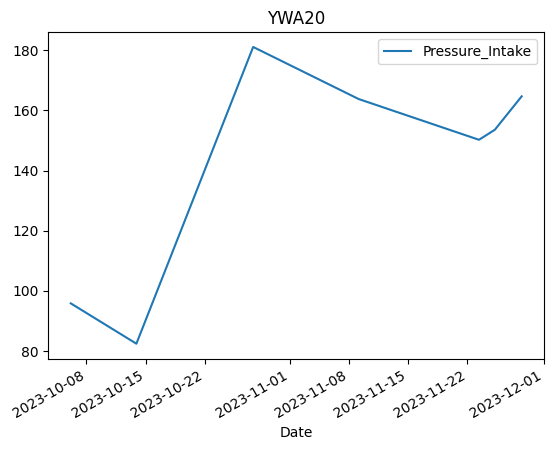

<Figure size 640x480 with 0 Axes>

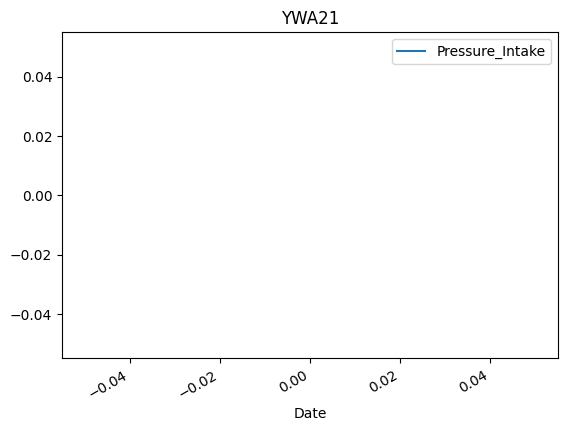

<Figure size 640x480 with 0 Axes>

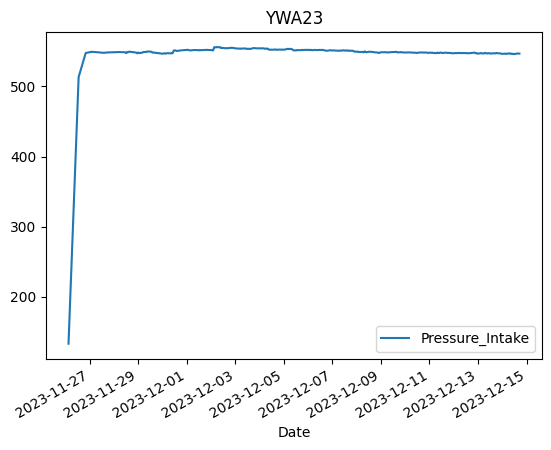

<Figure size 640x480 with 0 Axes>

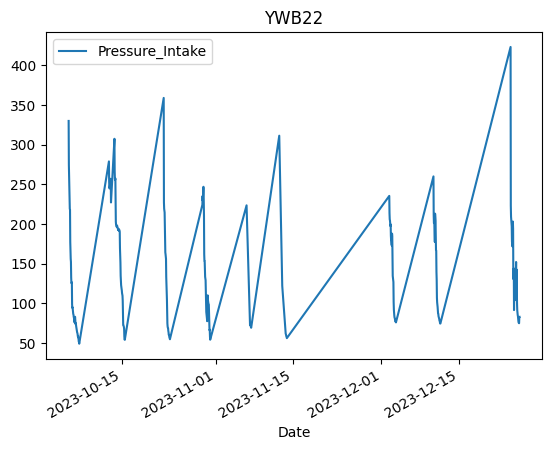

<Figure size 640x480 with 0 Axes>

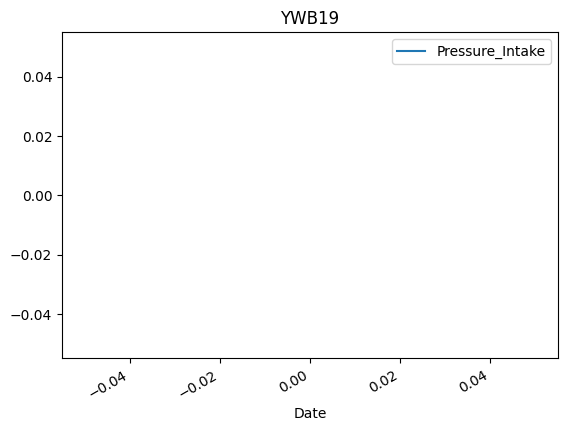

<Figure size 640x480 with 0 Axes>

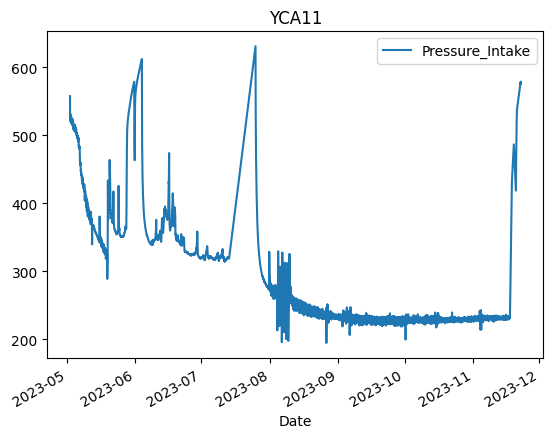

<Figure size 640x480 with 0 Axes>

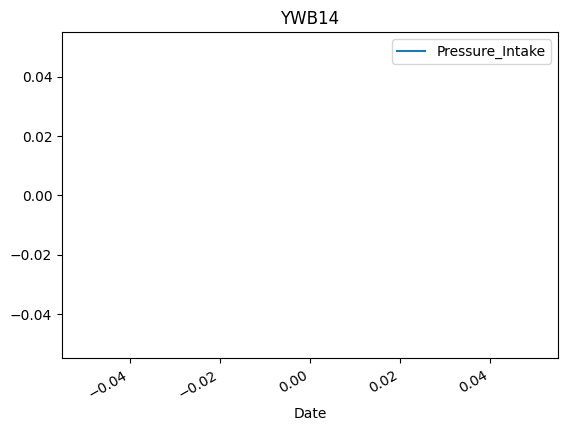

<Figure size 640x480 with 0 Axes>

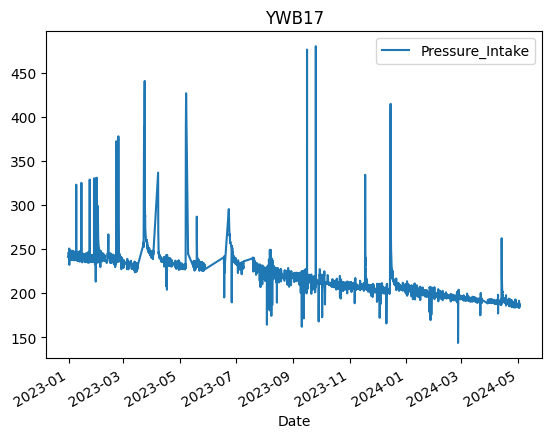

<Figure size 640x480 with 0 Axes>

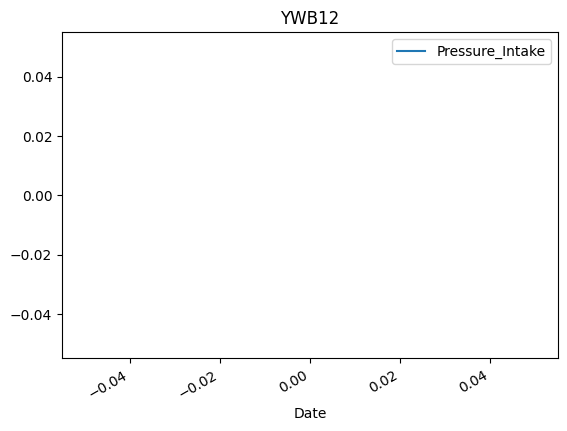

In [116]:
plot_pressure_intake(df2,dict_data_tab0)

In [117]:
def plot_pressure_discharge(df2,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        df2[df2['Well_ID']==key].plot(x='Date',y='Pressure_Discharge')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

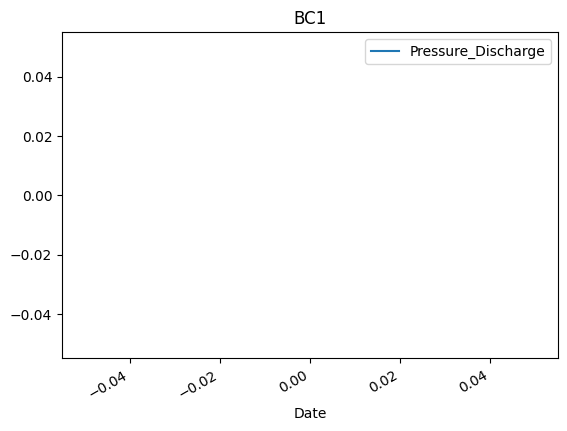

<Figure size 640x480 with 0 Axes>

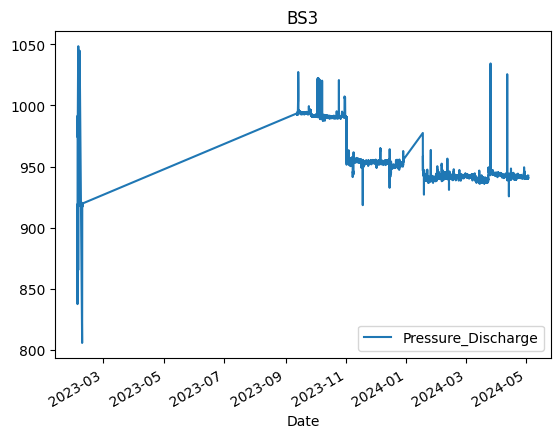

<Figure size 640x480 with 0 Axes>

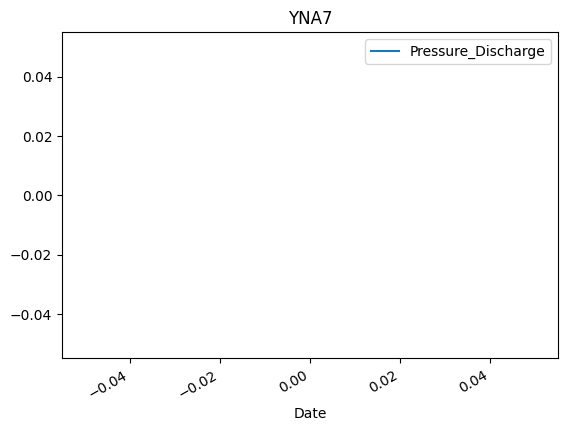

<Figure size 640x480 with 0 Axes>

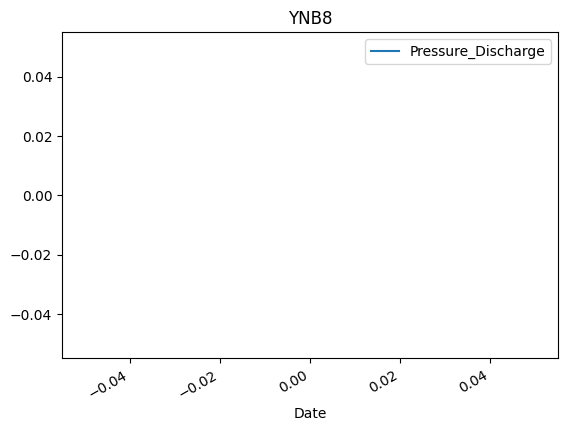

<Figure size 640x480 with 0 Axes>

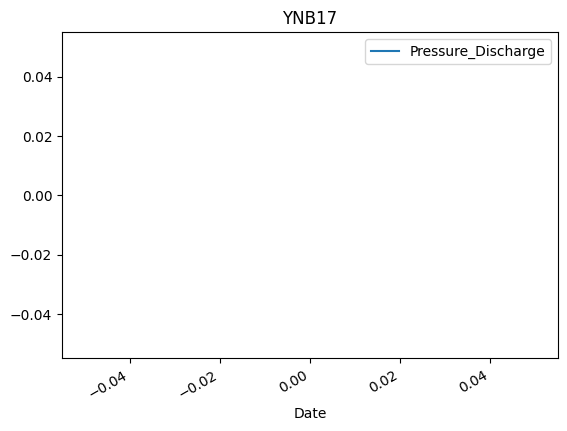

<Figure size 640x480 with 0 Axes>

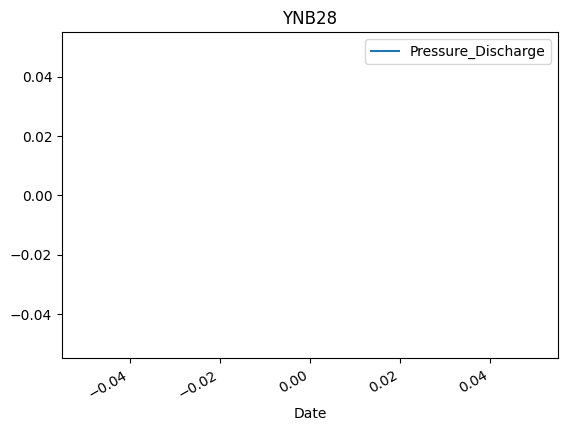

<Figure size 640x480 with 0 Axes>

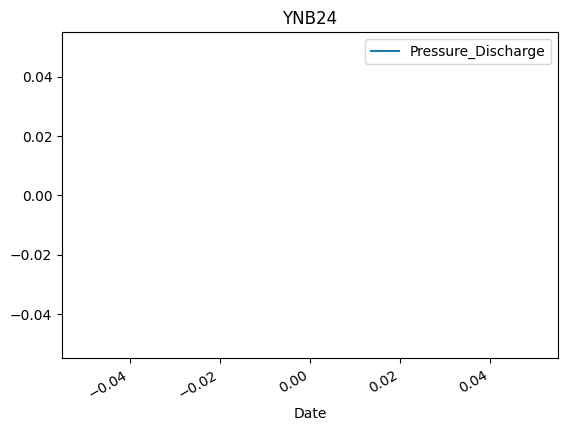

<Figure size 640x480 with 0 Axes>

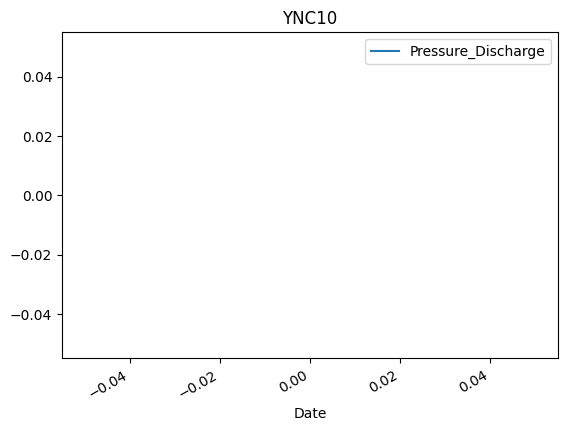

<Figure size 640x480 with 0 Axes>

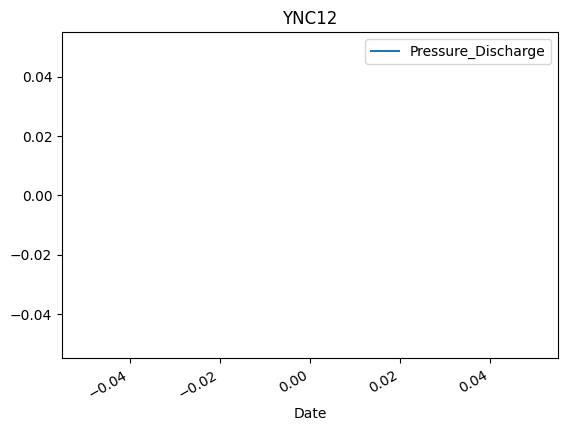

<Figure size 640x480 with 0 Axes>

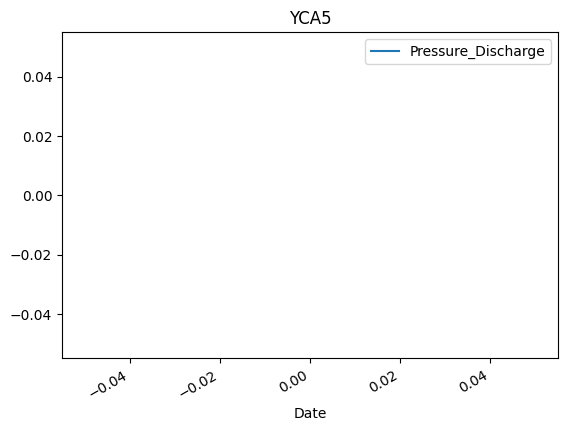

<Figure size 640x480 with 0 Axes>

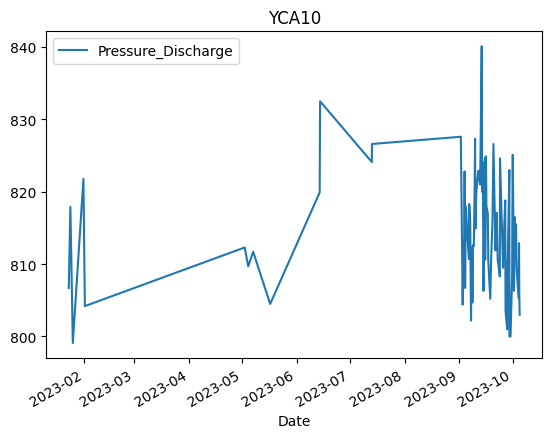

<Figure size 640x480 with 0 Axes>

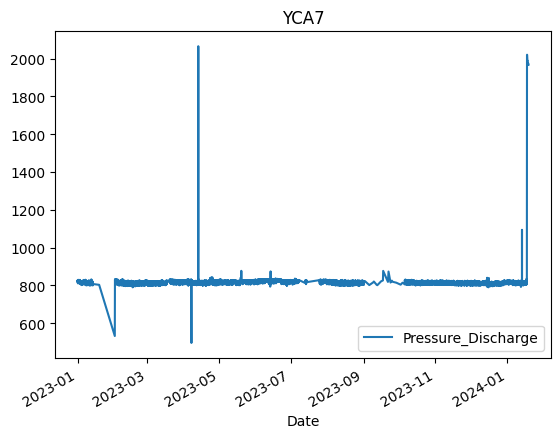

<Figure size 640x480 with 0 Axes>

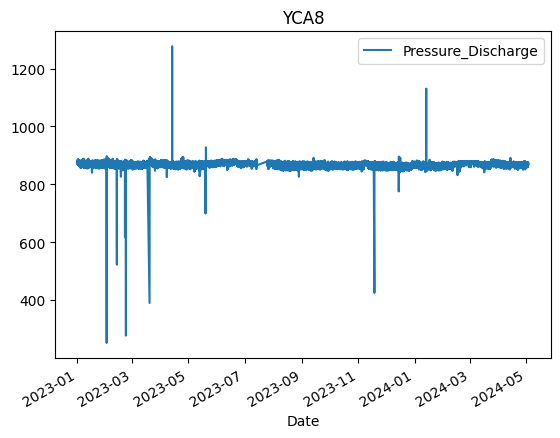

<Figure size 640x480 with 0 Axes>

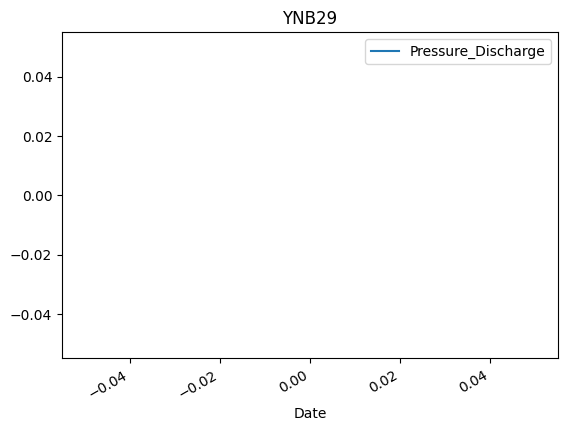

<Figure size 640x480 with 0 Axes>

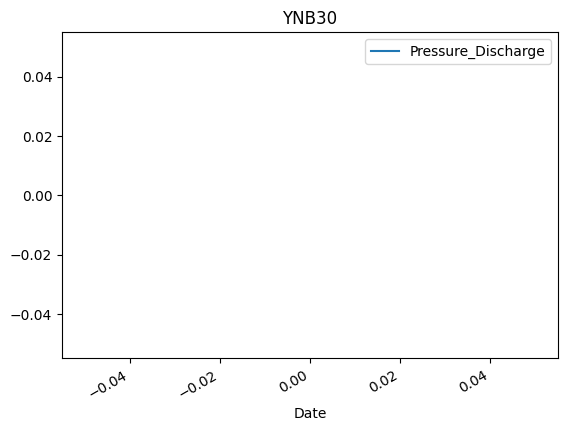

<Figure size 640x480 with 0 Axes>

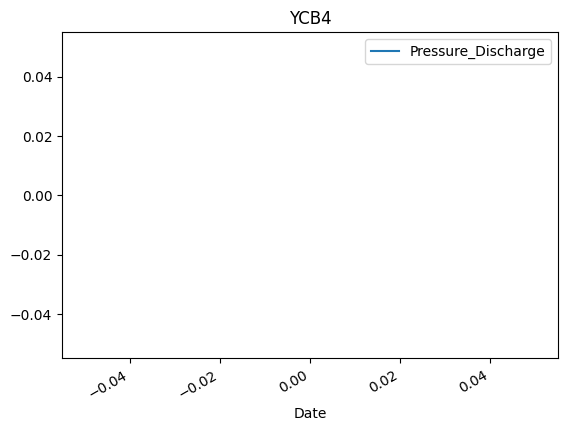

<Figure size 640x480 with 0 Axes>

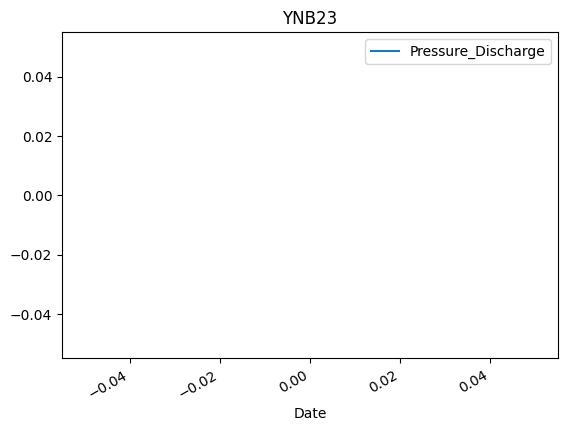

<Figure size 640x480 with 0 Axes>

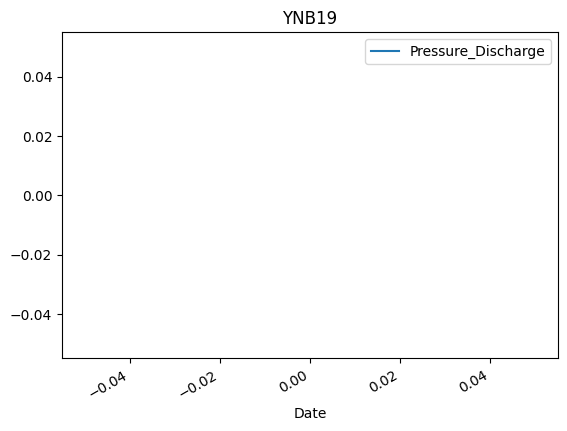

<Figure size 640x480 with 0 Axes>

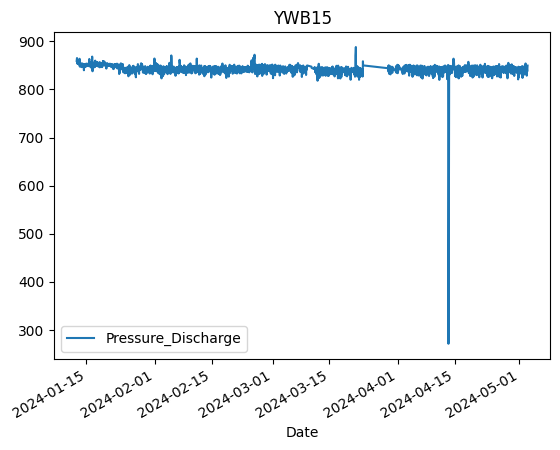

<Figure size 640x480 with 0 Axes>

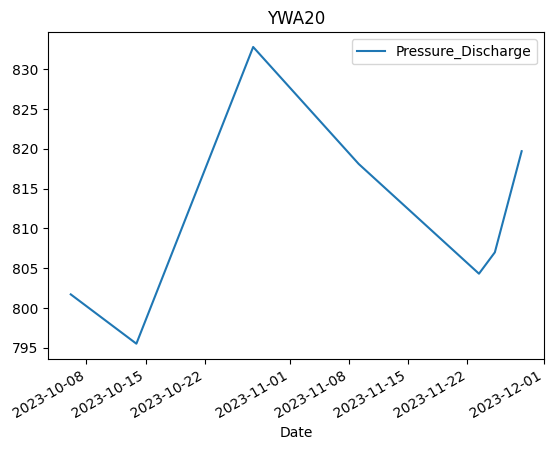

<Figure size 640x480 with 0 Axes>

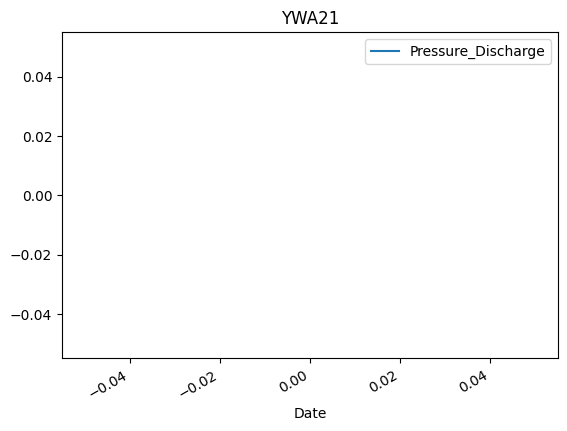

<Figure size 640x480 with 0 Axes>

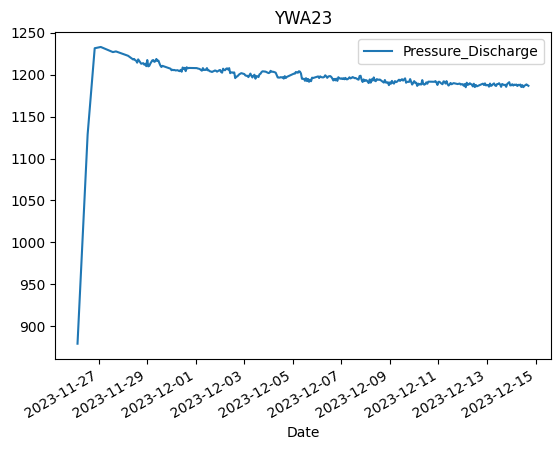

<Figure size 640x480 with 0 Axes>

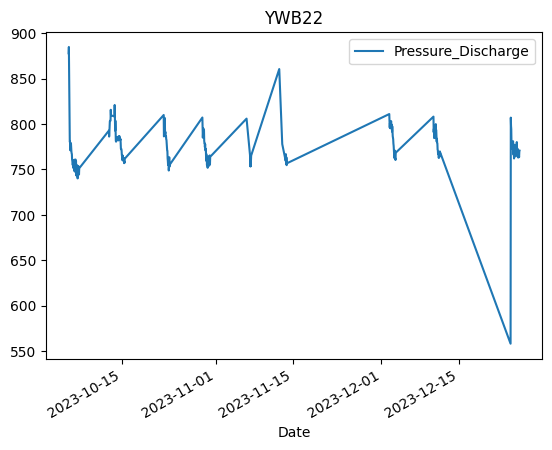

<Figure size 640x480 with 0 Axes>

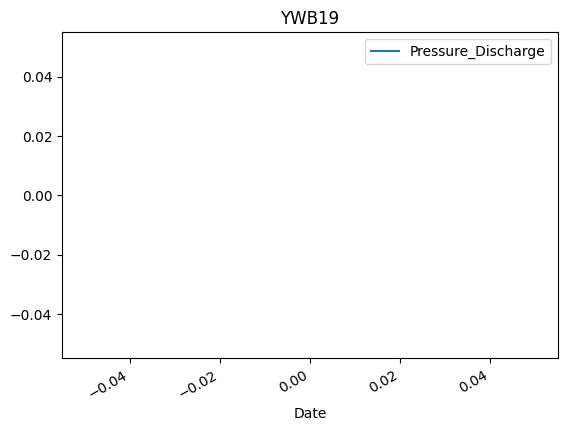

<Figure size 640x480 with 0 Axes>

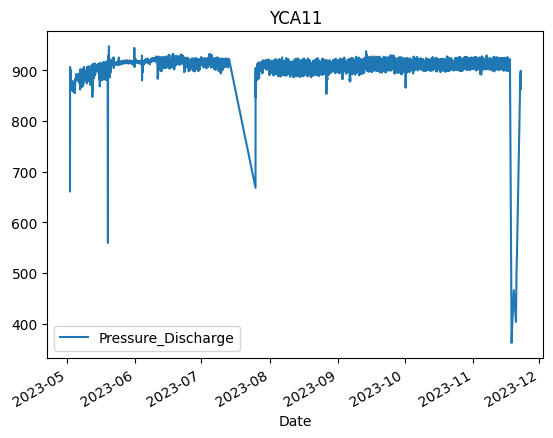

<Figure size 640x480 with 0 Axes>

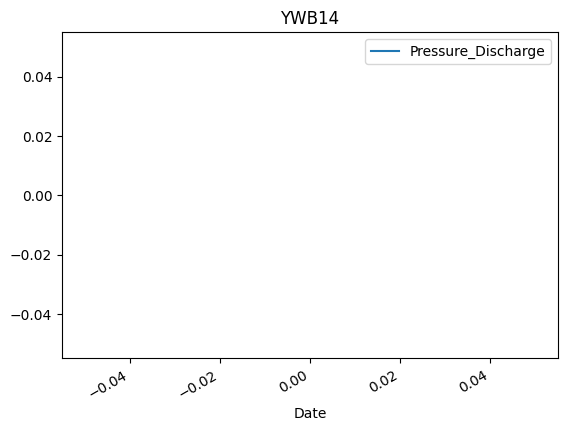

<Figure size 640x480 with 0 Axes>

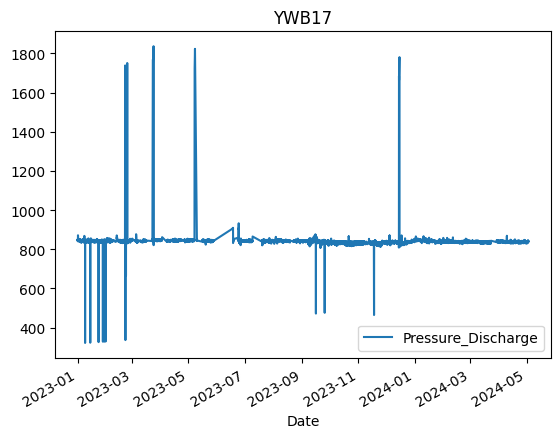

<Figure size 640x480 with 0 Axes>

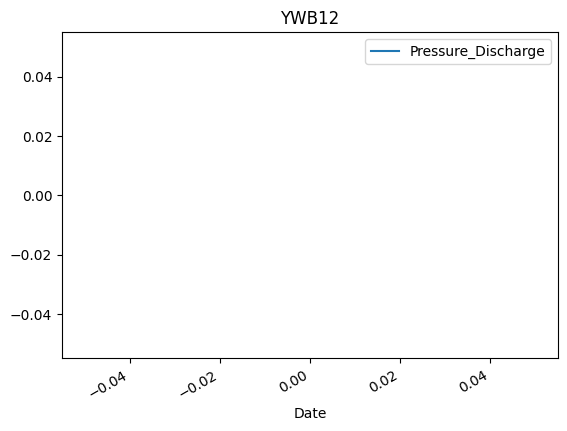

In [118]:
plot_pressure_discharge(df2,dict_data_tab0)

In [119]:
def plot_temp_intake(df2,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        df2[df2['Well_ID']==key].plot(x='Date',y='Temp_Intake')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

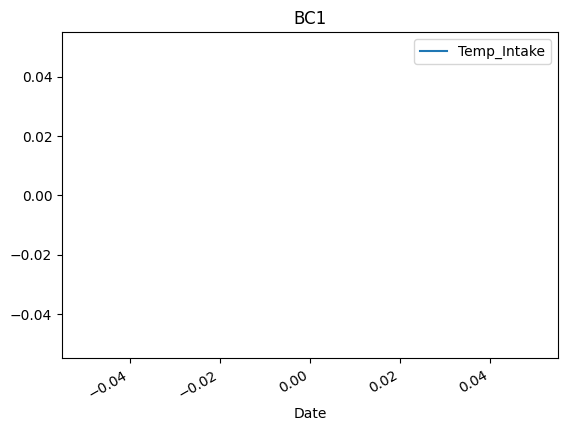

<Figure size 640x480 with 0 Axes>

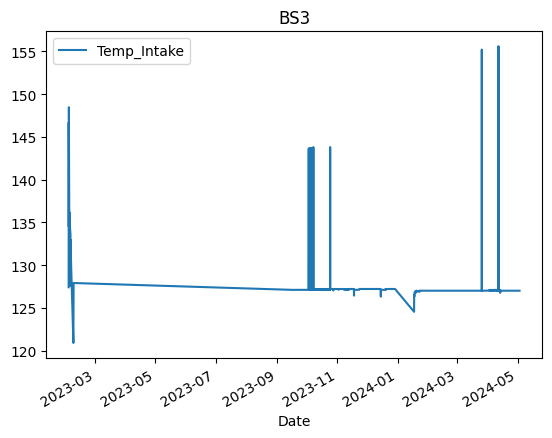

<Figure size 640x480 with 0 Axes>

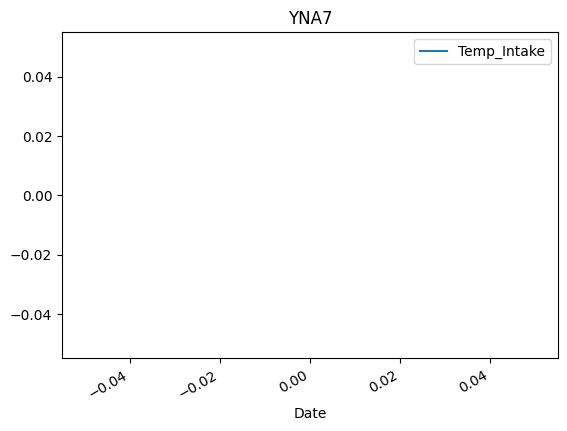

<Figure size 640x480 with 0 Axes>

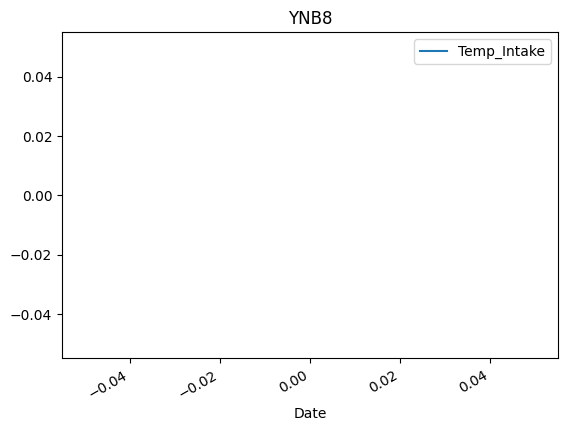

<Figure size 640x480 with 0 Axes>

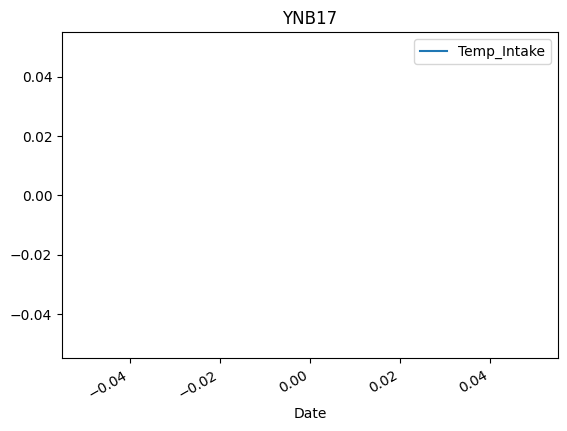

<Figure size 640x480 with 0 Axes>

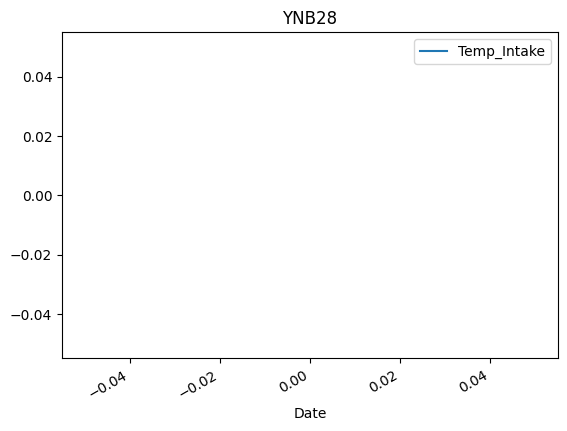

<Figure size 640x480 with 0 Axes>

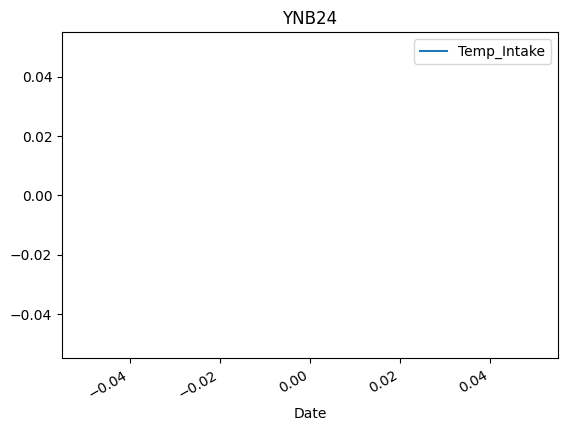

<Figure size 640x480 with 0 Axes>

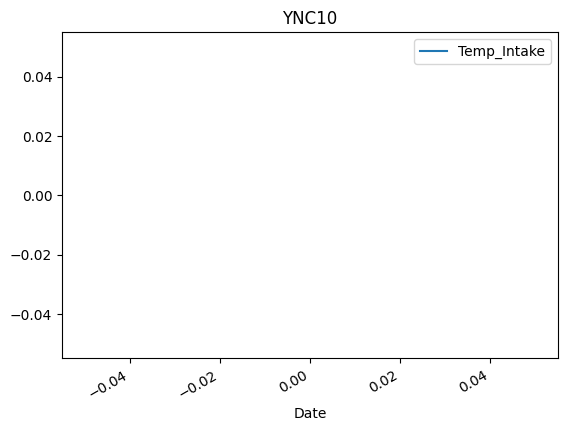

<Figure size 640x480 with 0 Axes>

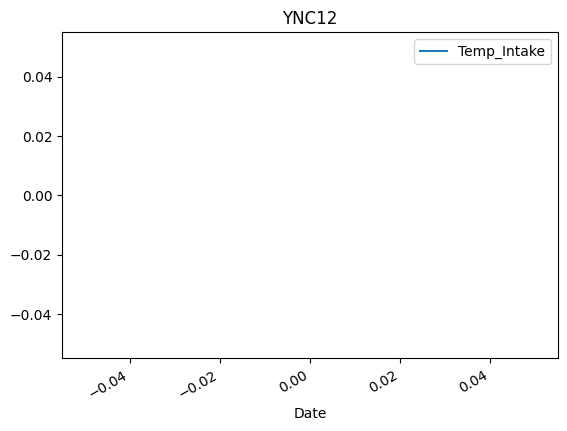

<Figure size 640x480 with 0 Axes>

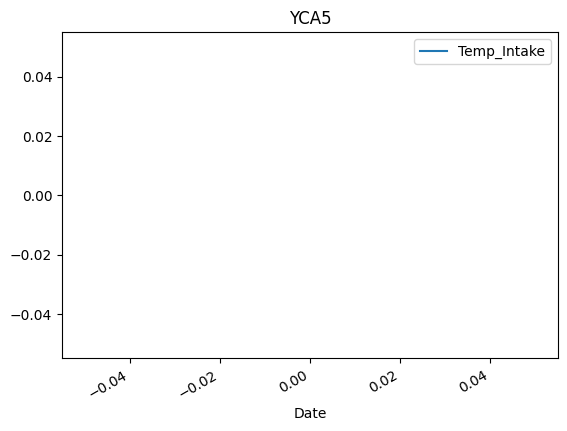

<Figure size 640x480 with 0 Axes>

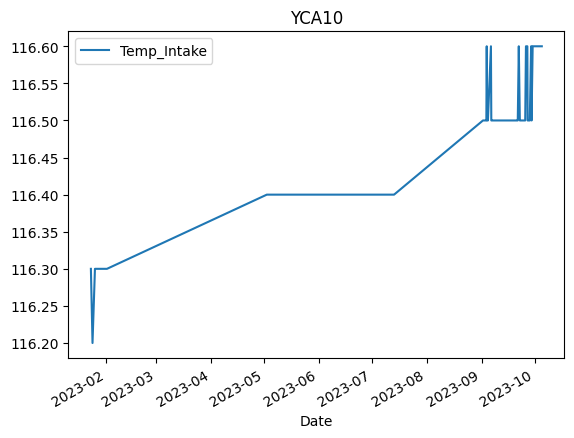

<Figure size 640x480 with 0 Axes>

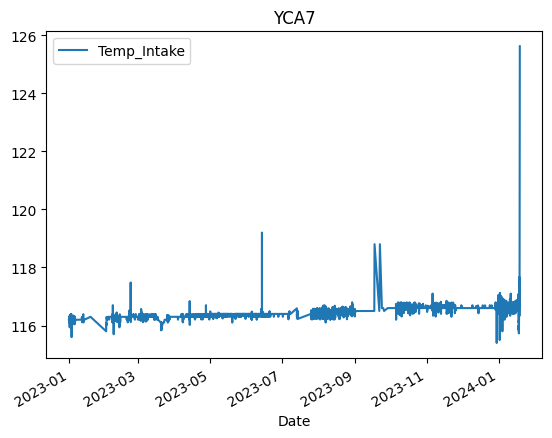

<Figure size 640x480 with 0 Axes>

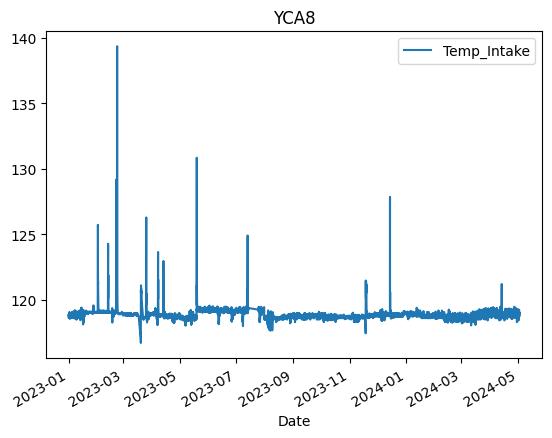

<Figure size 640x480 with 0 Axes>

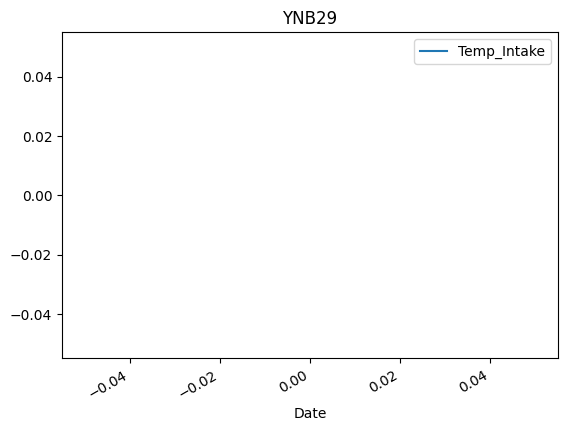

<Figure size 640x480 with 0 Axes>

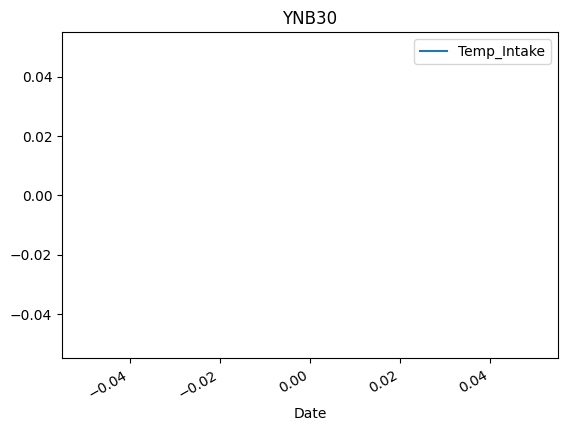

<Figure size 640x480 with 0 Axes>

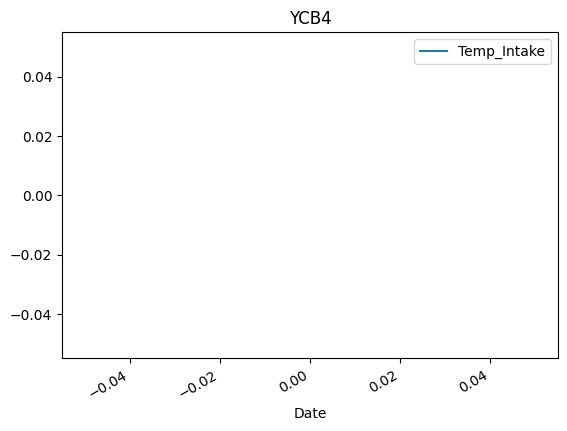

<Figure size 640x480 with 0 Axes>

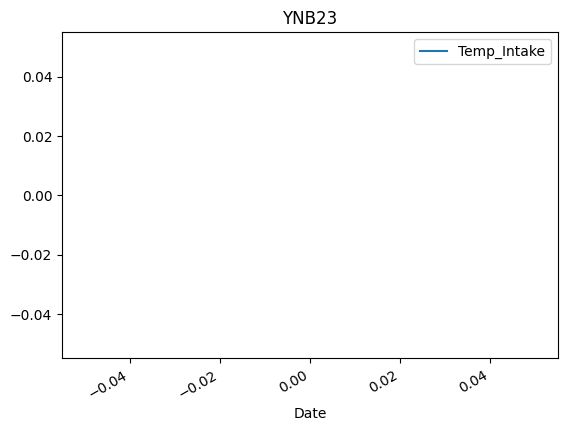

<Figure size 640x480 with 0 Axes>

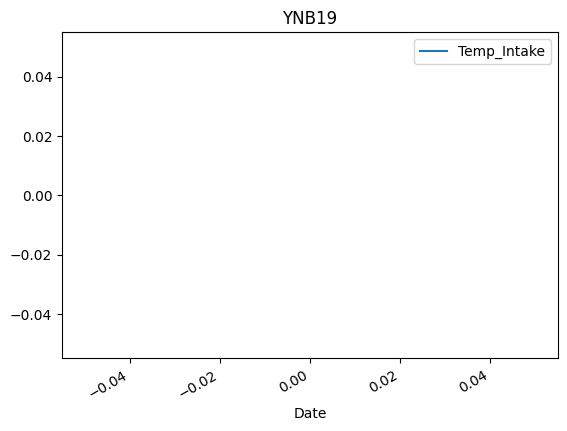

<Figure size 640x480 with 0 Axes>

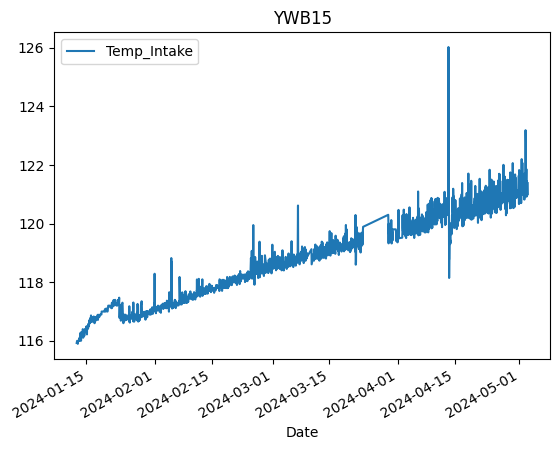

<Figure size 640x480 with 0 Axes>

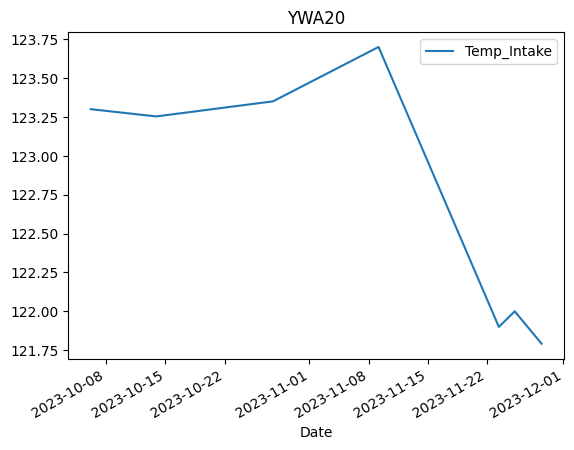

<Figure size 640x480 with 0 Axes>

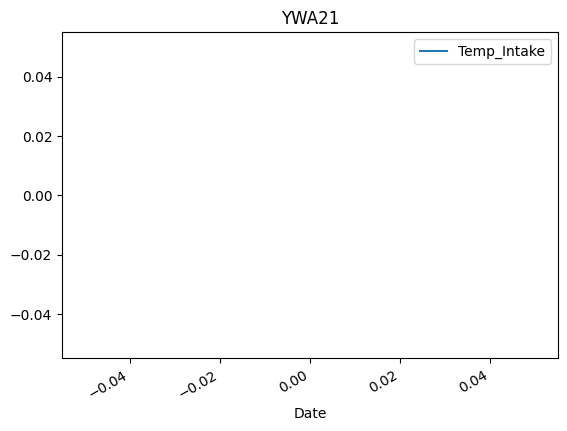

<Figure size 640x480 with 0 Axes>

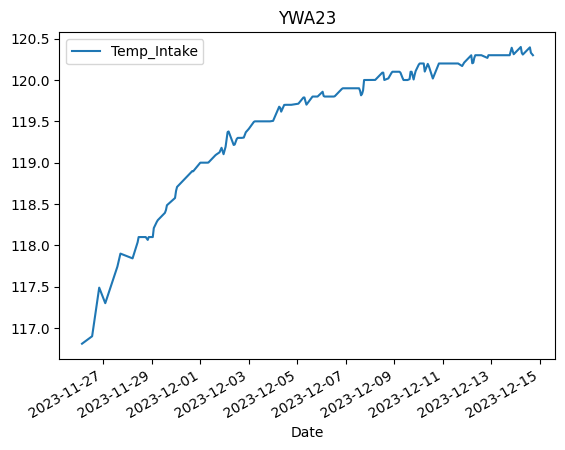

<Figure size 640x480 with 0 Axes>

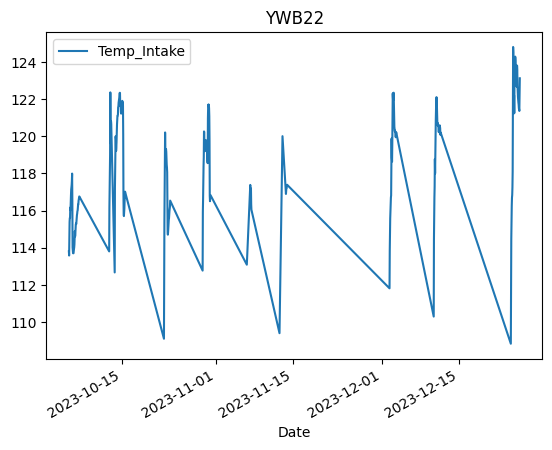

<Figure size 640x480 with 0 Axes>

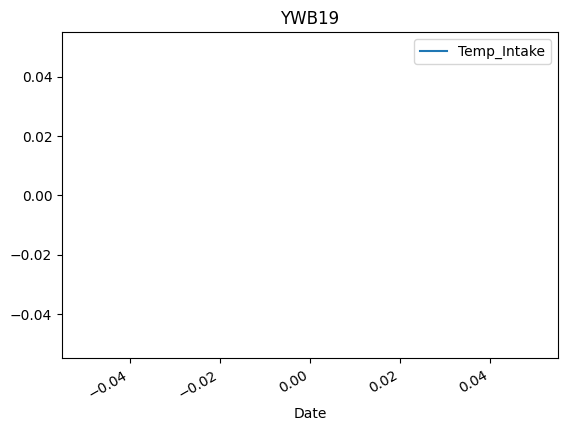

<Figure size 640x480 with 0 Axes>

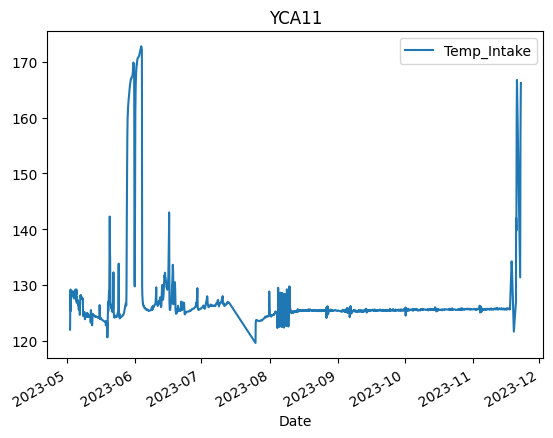

<Figure size 640x480 with 0 Axes>

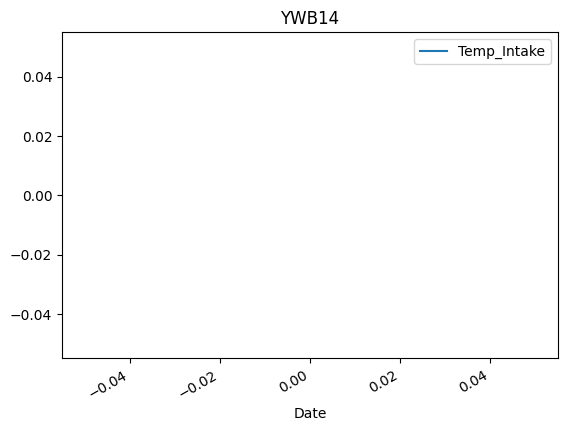

<Figure size 640x480 with 0 Axes>

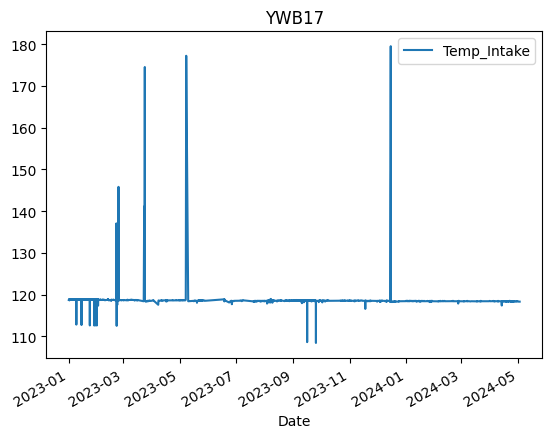

<Figure size 640x480 with 0 Axes>

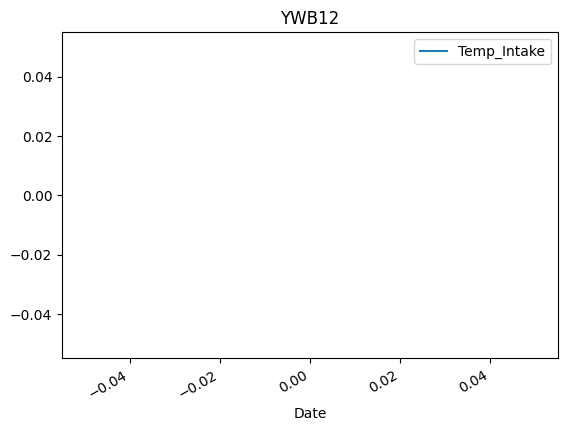

In [120]:
plot_temp_intake(df2,dict_data_tab0)

In [121]:
def plot_temp_motor(df2,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        df2[df2['Well_ID']==key].plot(x='Date',y='Temp_Motor')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

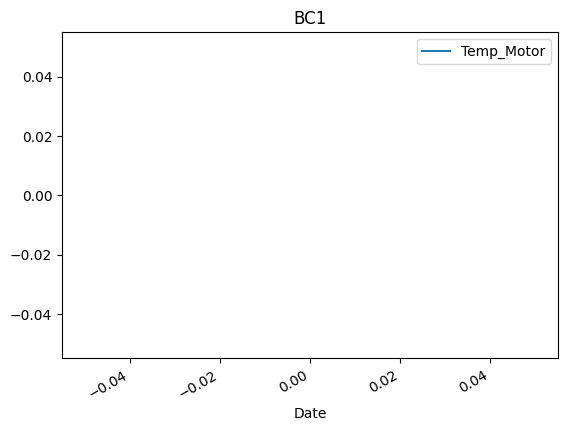

<Figure size 640x480 with 0 Axes>

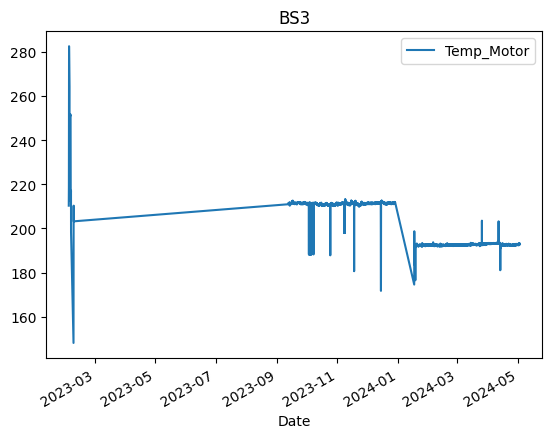

<Figure size 640x480 with 0 Axes>

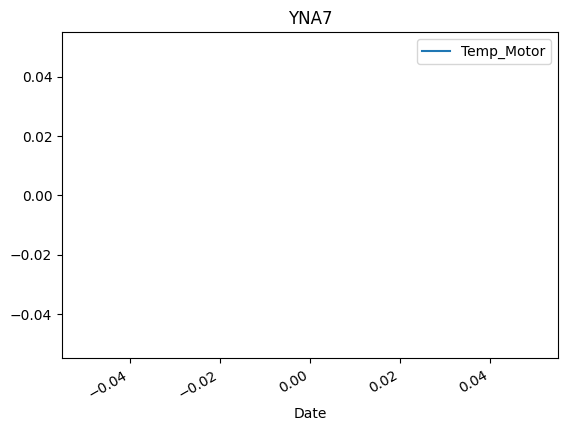

<Figure size 640x480 with 0 Axes>

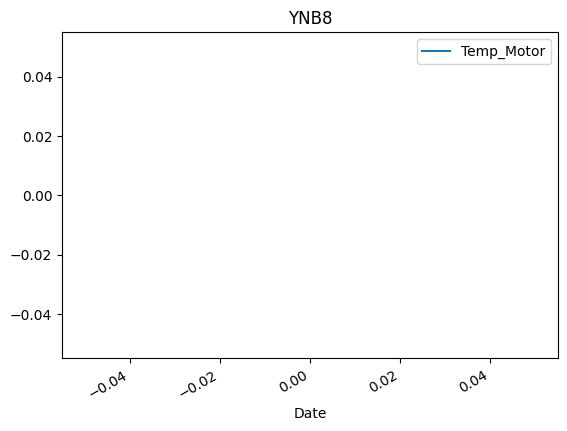

<Figure size 640x480 with 0 Axes>

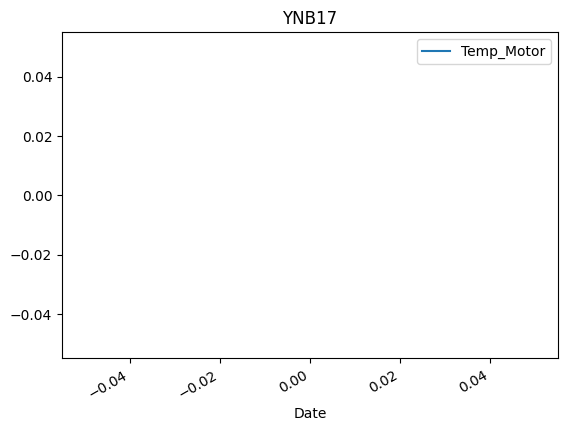

<Figure size 640x480 with 0 Axes>

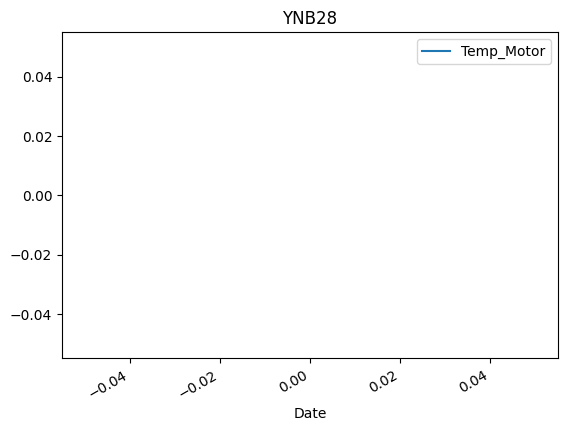

<Figure size 640x480 with 0 Axes>

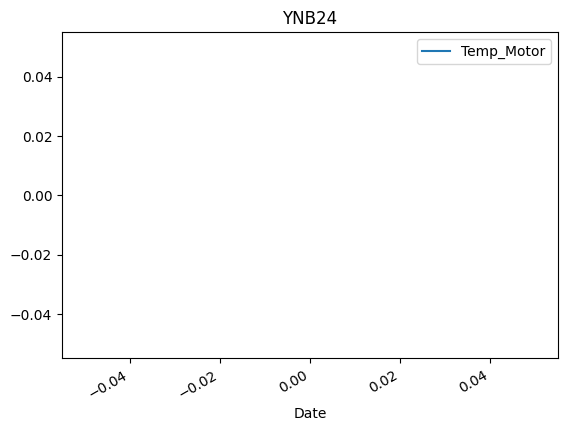

<Figure size 640x480 with 0 Axes>

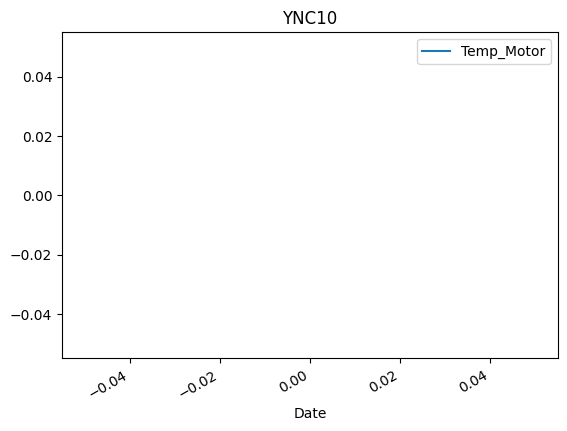

<Figure size 640x480 with 0 Axes>

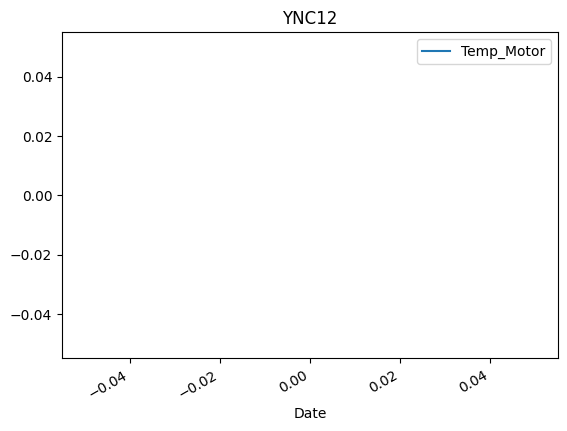

<Figure size 640x480 with 0 Axes>

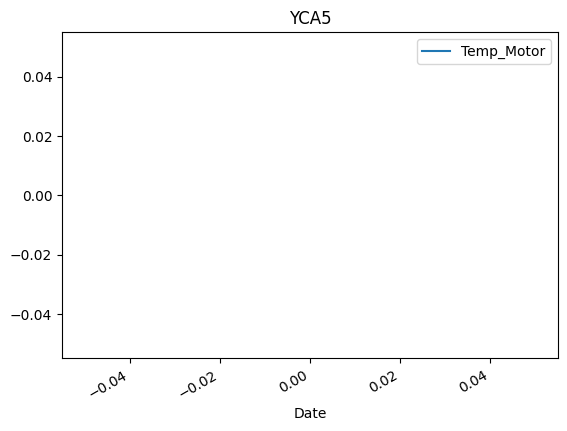

<Figure size 640x480 with 0 Axes>

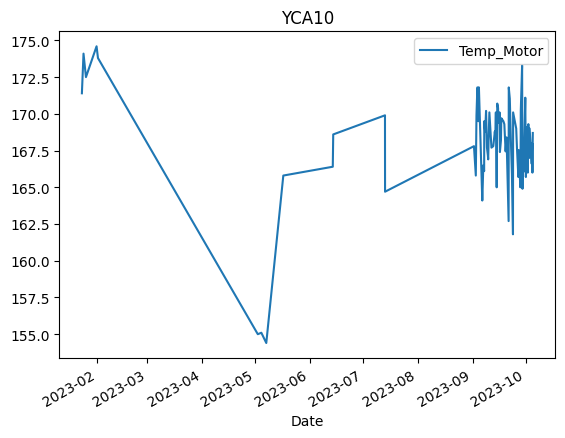

<Figure size 640x480 with 0 Axes>

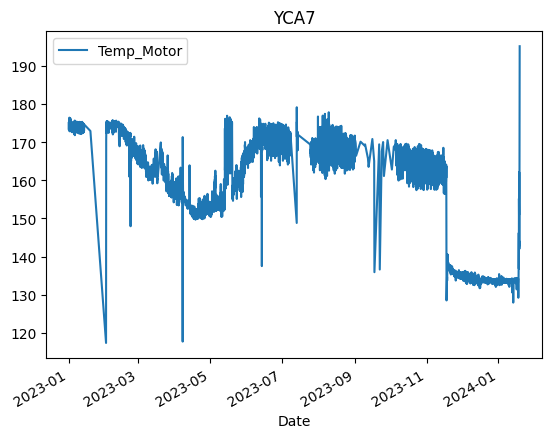

<Figure size 640x480 with 0 Axes>

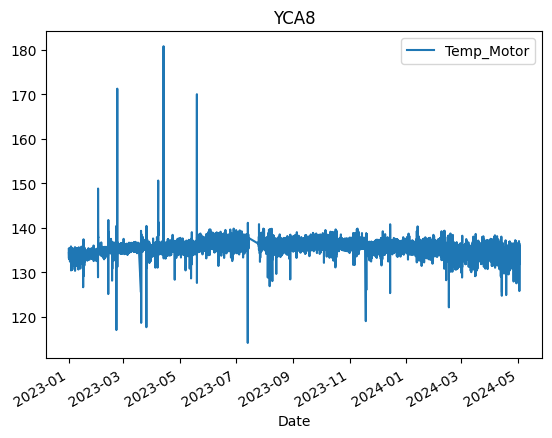

<Figure size 640x480 with 0 Axes>

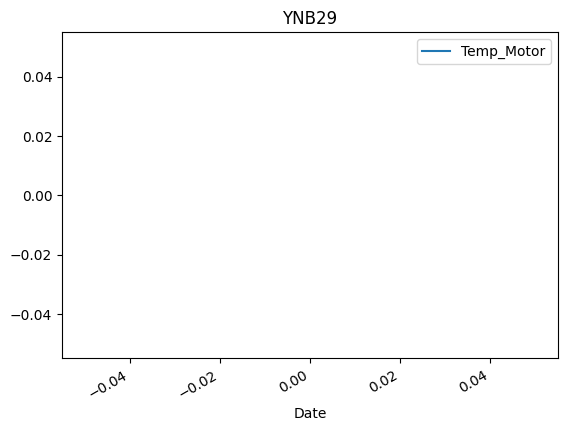

<Figure size 640x480 with 0 Axes>

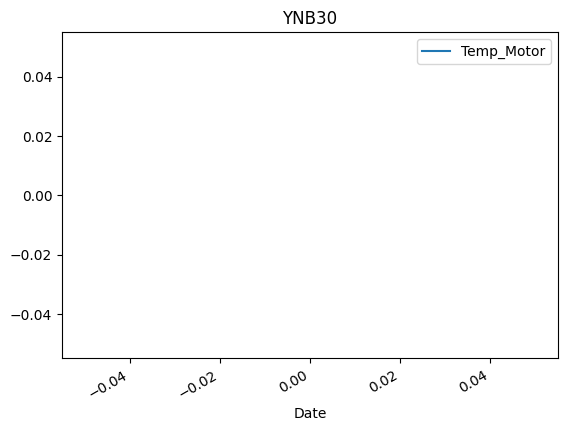

<Figure size 640x480 with 0 Axes>

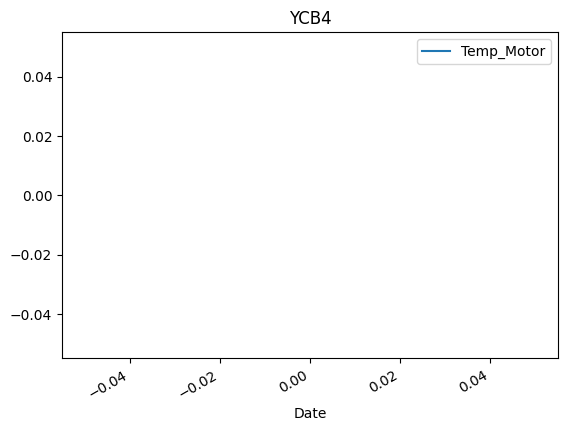

<Figure size 640x480 with 0 Axes>

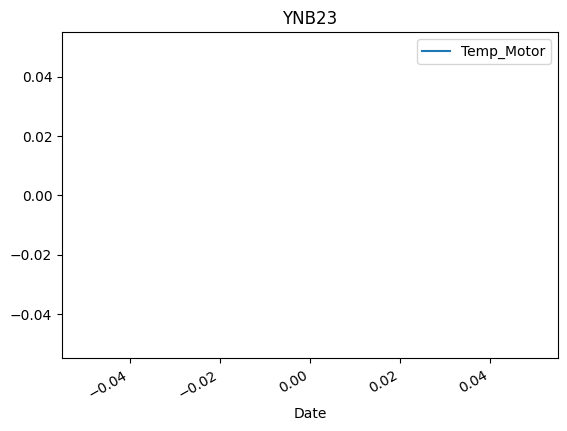

<Figure size 640x480 with 0 Axes>

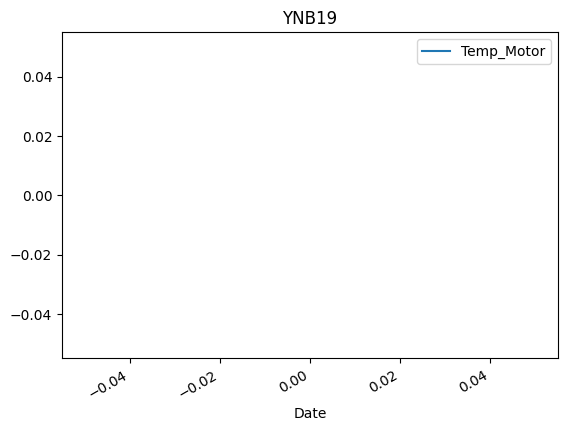

<Figure size 640x480 with 0 Axes>

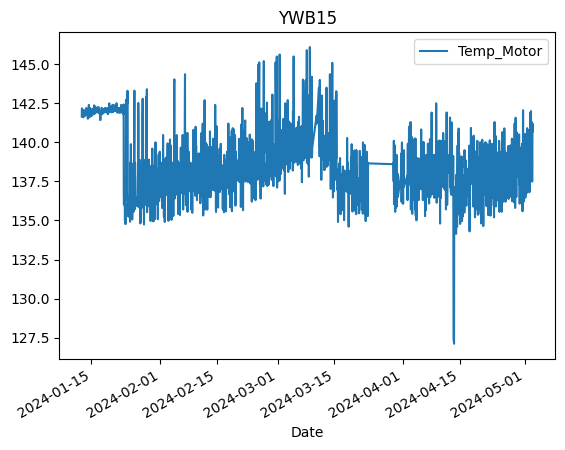

<Figure size 640x480 with 0 Axes>

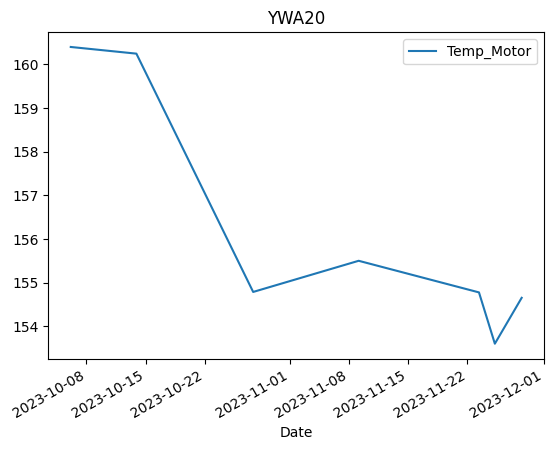

<Figure size 640x480 with 0 Axes>

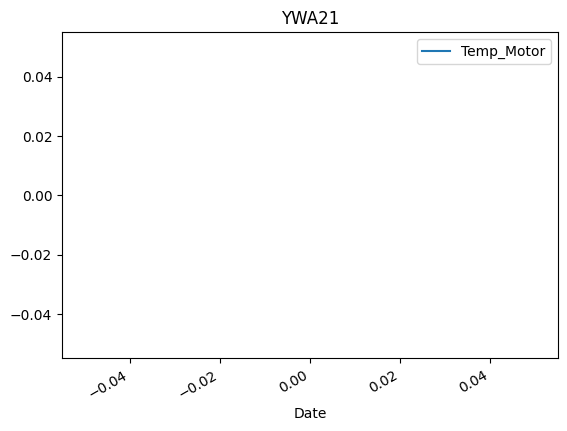

<Figure size 640x480 with 0 Axes>

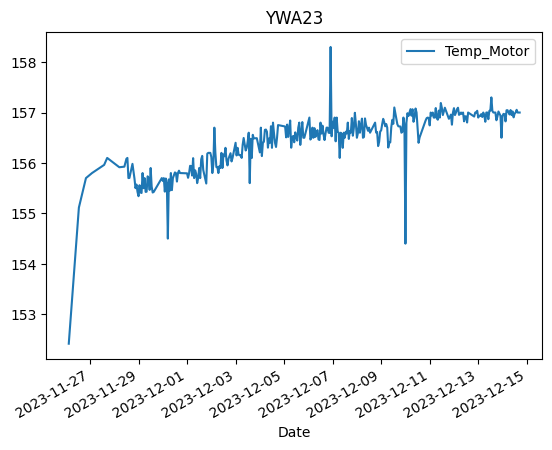

<Figure size 640x480 with 0 Axes>

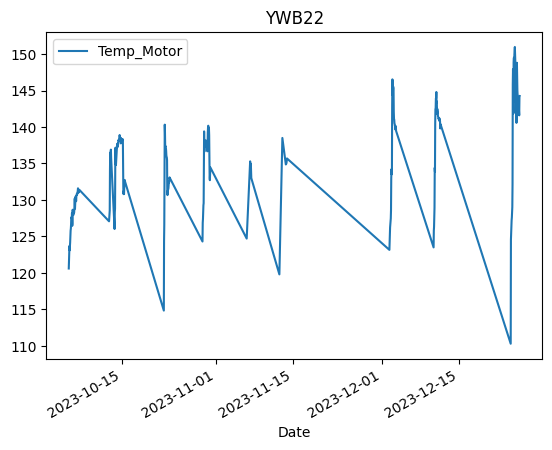

<Figure size 640x480 with 0 Axes>

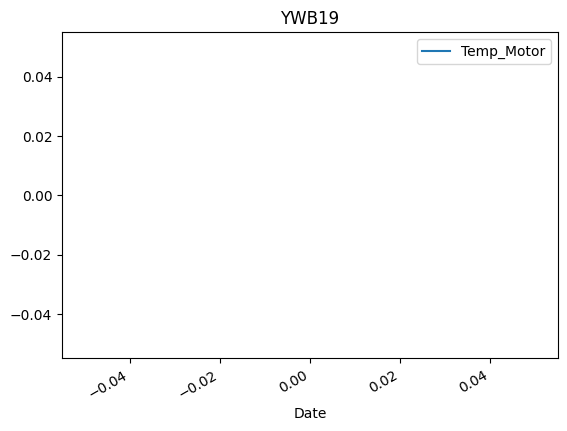

<Figure size 640x480 with 0 Axes>

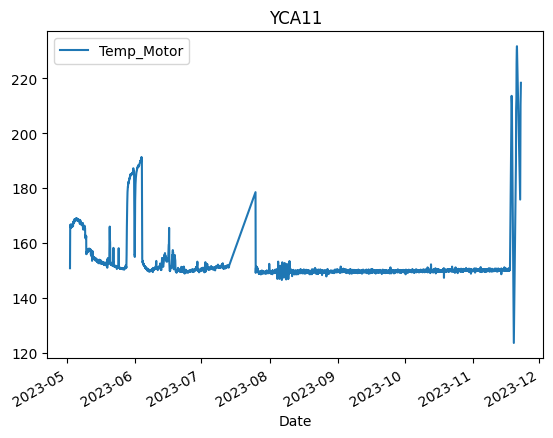

<Figure size 640x480 with 0 Axes>

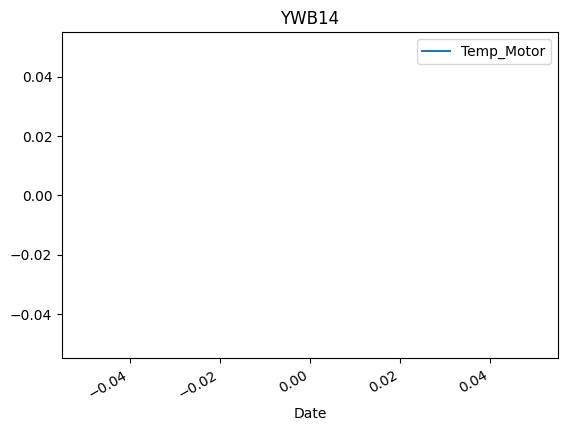

<Figure size 640x480 with 0 Axes>

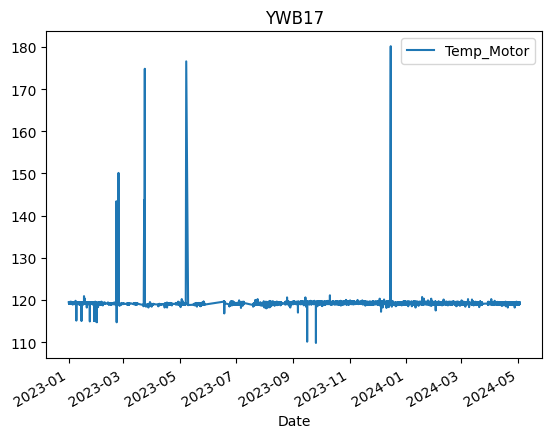

<Figure size 640x480 with 0 Axes>

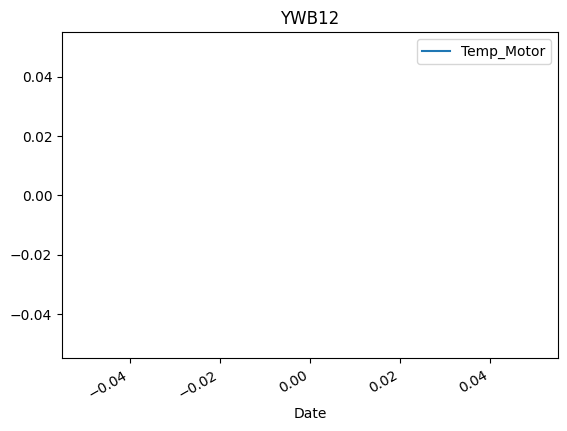

In [122]:
plot_temp_motor(df2,dict_data_tab0)